# Load libraries

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from dask.distributed import Client
from datetime import timedelta
import datetime
import xarray as xr

sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av

In [2]:
def calculate_sie(filenames, timestep='daily'):
    ds = xr.open_dataset(filenames[0])
    LN = ds.TLON.values
    LT = ds.TLAT.values
    lat_idx = LT[:,0] < 0
    # Initialise arrays
    n_lon,n_lat = LN.shape
    n_days = len(onlyfiles)
    print(n_days)
    SIA = np.empty((n_days))
    SIE = np.empty((n_days))
    
    # Open the file
    for idx, file in tqdm(enumerate(onlyfiles), total = len(onlyfiles)):
        #print(file)
        if timestep == 'daily':
            file_dates.append(np.datetime64(file[-13:-3]))
        elif timestep == 'monthly':
             file_dates.append(np.datetime64(file[-10:-3]))
        ds = xr.open_dataset(file)
        aice = ds.aice
        lat = ds.TLAT
        dA = ds.HTE
        dA_south = dA.where(lat<0, drop=True)
        # First take only the southern hemisphere
        aice_south = (ds.aice.where(lat<0, drop=True)).squeeze() 
        # Then take all ice exceeding the ice edge
        aice_only= aice_south.where(aice_south>0.15, drop=True) 
    
        tarea_south = (ds.tarea.where(lat<0, drop=True))
        tarea_aice_only = tarea_south.where(aice_south>0.15, drop=True)
        weights = tarea_south#np.multiply(hte_south, aice_south)
        weights.name = "Areal weights"
    
        aice_weighted = aice_south.weighted(weights)
        SIA[idx] = (aice_weighted.sum(("nj", "ni")).values)/(10**12)
        SIE[idx] = (tarea_aice_only.sum(("nj", "ni")).values)/(10**12)
    return (file_dates, SIE, SIA)

In [12]:
year = 2019
COLOR_MIZ = [0.9805, 0.5000, 0.4453, 1.0]
COLOR_FSD = sns.color_palette("colorblind",15)[2]
COLOR_WAVE = sns.color_palette("colorblind",15)[3]
COLOR_IAGE = sns.color_palette("colorblind",15)[4]
COLOR_INTERIOR = sns.color_palette("colorblind",15)[0]

# Plot settings
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
textwidth = 3.31314*2
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

#plt.style.use("seaborn")


plt.style.use('default')
plt.style.use(['science','ieee', 'grid'])
sns.set_context("paper")
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
font_size = 14
mpl.rcParams.update({'font.size': font_size})
mpl.rcParams.update({"axes.grid" : True, "grid.color": [0.6, 0.6, 0.6]})
sns.color_palette("colorblind",15)

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

filename = '/g/data/ia40/sea-ice-classification/kmean_' + str(year) + '.nc'
ds_mask = xr.open_dataset(filename)
LT = ds_mask['LAT']
LN = ds_mask['LON']
land_mask = ds_mask['tmask'].where(ds_mask['tmask'][:,:] != 1.) 
del ds_mask

In [16]:
beta0 = 5.376168295200780E-005
beta1 = 2.947870279251530E-005

a = 2.12E-003 # × 10−3# (s2/m) and 
b = 4.59E-002 # × 10−2 (s4/m) 

# omega = (2*pi)/T
# 𝛼(T)= a + b. (3) T2 T4
a1 = a/(2*np.pi)**2
b1 = b/(2*np.pi)**4
print(a1)
print(b1)

5.370022733043902e-05
2.9450536593125694e-05


In [11]:
a1

0.08369424532123776

# Sea ice area/extent

### CICE-WIM-10

In [14]:
mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
year = 2019

# Start
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'

onlyfiles = glob.glob("{path}/iceh.*".format(path=mypath))
onlyfiles.sort()
onlyfiles = onlyfiles[-365*10-2:] #[-365*6:-365*2]

ds = xr.open_dataset(filename)
LN = ds.TLON.values
LT = ds.TLAT.values
lat_idx = LT[:,0] < 0
onlyfiles = onlyfiles[-365:]
# Initialise arrays
n_lon,n_lat = LN.shape
n_days = len(onlyfiles)
print(n_days)
SIA = np.empty((n_days))
SIE = np.empty((n_days))

# Open the file
for idx, file in tqdm(enumerate(onlyfiles), total = len(onlyfiles)):
    #print(file)
    file_dates.append(np.datetime64(file[-13:-3]))
    ds = xr.open_dataset(file)
    aice = ds.aice
    lat = ds.TLAT
    dA = ds.HTE
    dA_south = dA.where(lat<0, drop=True)
    # First take only the southern hemisphere
    aice_south = (ds.aice.where(lat<0, drop=True)).squeeze() 
    # Then take all ice exceeding the ice edge
    aice_only= aice_south.where(aice_south>0.15, drop=True) 

    tarea_south = (ds.tarea.where(lat<0, drop=True))
    tarea_aice_only = tarea_south.where(aice_south>0.15, drop=True)
    weights = tarea_south#np.multiply(hte_south, aice_south)
    weights.name = "Areal weights"

    aice_weighted = aice_south.weighted(weights)
    SIA[idx] = (aice_weighted.sum(("nj", "ni")).values)/(10**12)
    SIE[idx] = (tarea_aice_only.sum(("nj", "ni")).values)/(10**12)
#    print((aice_weighted.sum(("nj", "ni")).values)/(10**12))

2019
365


100%|██████████| 365/365 [01:05<00:00,  5.59it/s]


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman


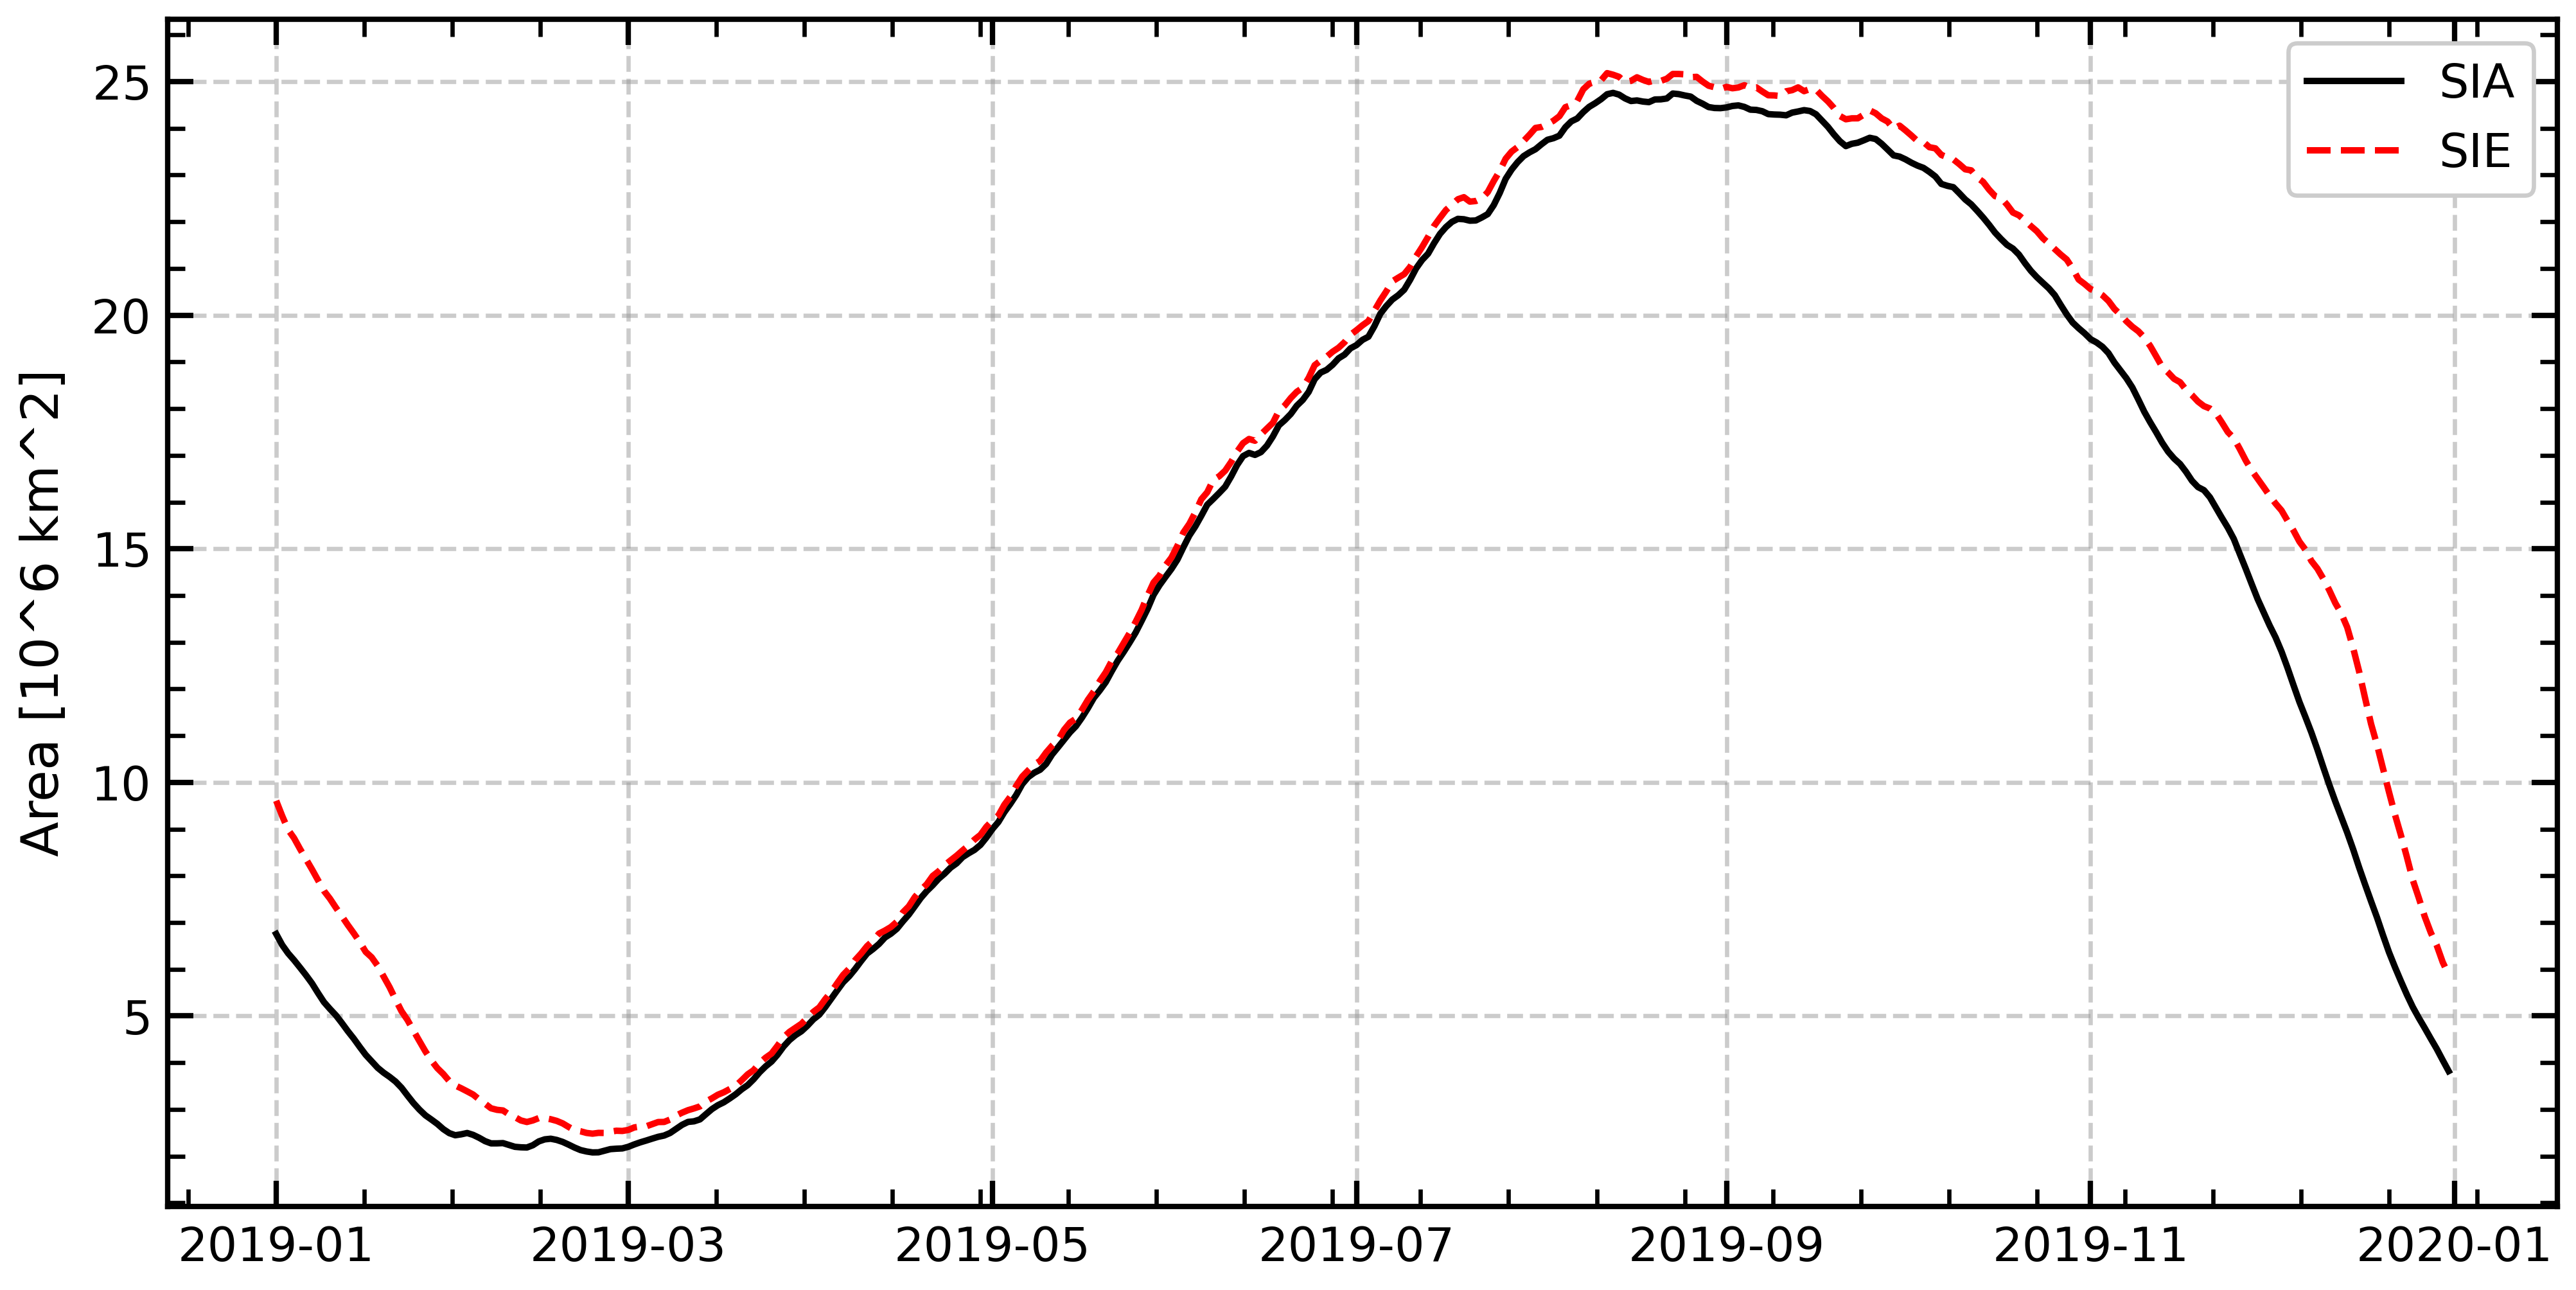

In [17]:
rc('text', usetex=False)
fig = plt.figure(figsize=[8, 4])
ax = fig.add_subplot(1, 1, 1)
ax.plot(file_dates, SIA, label="SIA")
ax.plot(file_dates, SIE, label="SIE")
ax.set(ylabel='Area [10^6 km^2]')
ax.legend()
#ax.set_xlabel(fontsize=3)
#set_ax_date(ax, plot_type="ts")
#plot(SIA)
t1 = file_dates[0].astype(datetime.datetime).strftime('%Y')
t2 = file_dates[-1].astype(datetime.datetime).strftime('%Y')

savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'sia_ts_10deg_'+t1+'_'+t2+'.png', dpi = 300)  

In [ ]:
df = pd.DataFrame({"date": file_dates,
                   "SIA": SIA,
                   "SIE": SIE,
                    })
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
dates = pd.to_datetime(df['date'].values, format='%Y-%m-%d')
df['month-day'] = dates.strftime('%m-%d')
df.drop(df[df['month-day'] == '02-29'].index, inplace = True)
df['month-day'] = pd.to_datetime(df['month-day'].values, format='%m-%d')
dates = pd.to_datetime(df['date'].values, format='%Y-%m-%d')
df['year'] = dates.strftime('%Y')
df['year'] = pd.to_datetime(df['year'].values, format='%Y')

savepath = '/g/data/ia40/sea-ice-classification/dataframes/'
savefilename = 'SIE_10deg_'+t1+'_'+t2+'.csv'
df.to_csv(savepath+savefilename)

In [ ]:
# Get the average date of the annual SIE minimum and maximum

def avg(dates):
  any_reference_date = datetime.datetime(1900, 1, 1)
  return any_reference_date + sum([date - any_reference_date for date in dates], datetime.timedelta()) / len(dates)

df = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/SIE_10deg_2010_2019.csv')

idx = df.groupby(['year'])['SIE'].transform(max) == df['SIE']
#print(avg(df[idx]['month-day']))

idx = df.groupby(['year'])['SIE'].transform(min) == df['SIE']
#print(avg(df[idx]['month-day']))


In [ ]:

df[idx]['month-day']

In [ ]:

pd.to_datetime(df['SIA']).shape

In [ ]:
#fig, ax = plt.subplots((width, height))
df = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/SIE_10deg_2010_2019.csv') 
#df025 = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/SIA_ts_2019_2019_025deg.csv') 


fig = plt.figure()#figsize=[width, height])
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['date'], df['SIA'])
ax.set(ylabel='Sea ice extent')
#ax.set_xlabel(fontsize=3)
#set_ax_date(ax, plot_type="ts")
#plot(SIA)
savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'sia_ts_1deg.png', dpi = 300)  

In [ ]:
df

### CICE-WIM-025

In [19]:
mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history/'
year = 2011

# Start
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'

onlyfiles = glob.glob("{path}/iceh.{year}*".format(path=mypath, year = year))
onlyfiles.sort()
#onlyfiles = onlyfiles[-365*5:]#-365*4] #[-365*6:-365*2]

ds = xr.open_dataset(filename)
LN = ds.TLON.values
LT = ds.TLAT.values
lat_idx = LT[:,0] < 0
onlyfiles = onlyfiles
# Initialise arrays
n_lon,n_lat = LN.shape
n_days = len(onlyfiles)
print(n_days)
SIA = np.empty((n_days))
SIE = np.empty((n_days))

# Open the file
for idx, file in tqdm(enumerate(onlyfiles), total = len(onlyfiles)):
    #print(file)
    file_dates.append(np.datetime64(file[-13:-3]))
    ds = xr.open_dataset(file)
    aice = ds.aice
    lat = ds.TLAT
    dA = ds.HTE
    dA_south = dA.where(lat<0, drop=True)
    # First take only the southern hemisphere
    aice_south = (ds.aice.where(lat<0, drop=True)).squeeze() 
    # Then take all ice exceeding the ice edge
    aice_only= aice_south.where(aice_south>0.15, drop=True) 

    tarea_south = (ds.tarea.where(lat<0, drop=True))
    tarea_aice_only = tarea_south.where(aice_south>0.15, drop=True)
    weights = tarea_south#np.multiply(hte_south, aice_south)
    weights.name = "Areal weights"

    aice_weighted = aice_south.weighted(weights)
    SIA[idx] = (aice_weighted.sum(("nj", "ni")).values)/(10**12)
    SIE[idx] = (tarea_aice_only.sum(("nj", "ni")).values)/(10**12)
#    print((aice_weighted.sum(("nj", "ni")).values)/(10**12))

2011
365


100%|██████████| 365/365 [03:48<00:00,  1.60it/s]


In [5]:
mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history/'
year = 2019

# Start
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'

onlyfiles = glob.glob("{path}/iceh.*".format(path=mypath))
onlyfiles.sort()
onlyfiles = onlyfiles[-365*5:]#-365*4] #[-365*6:-365*2]

#filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'
#onlyfiles = glob.glob("{path}/iceh.{year}*".format(path=mypath,year=year))
#onlyfiles.sort()
#onlyfiles = onlyfiles[242:250]
file_dates_annual_30day100m, SIE_annual_30day100m, SIA_annual_30day100m = calculate_sie(onlyfiles, timestep='daily')

2019
1825


100%|██████████| 1825/1825 [27:05<00:00,  1.12it/s]


In [12]:
#file_dates
jan1 = [np.datetime64('2015-01-01'), np.datetime64('2016-01-01'), np.datetime64('2017-01-01'), np.datetime64('2018-01-01'), np.datetime64('2019-01-01')]

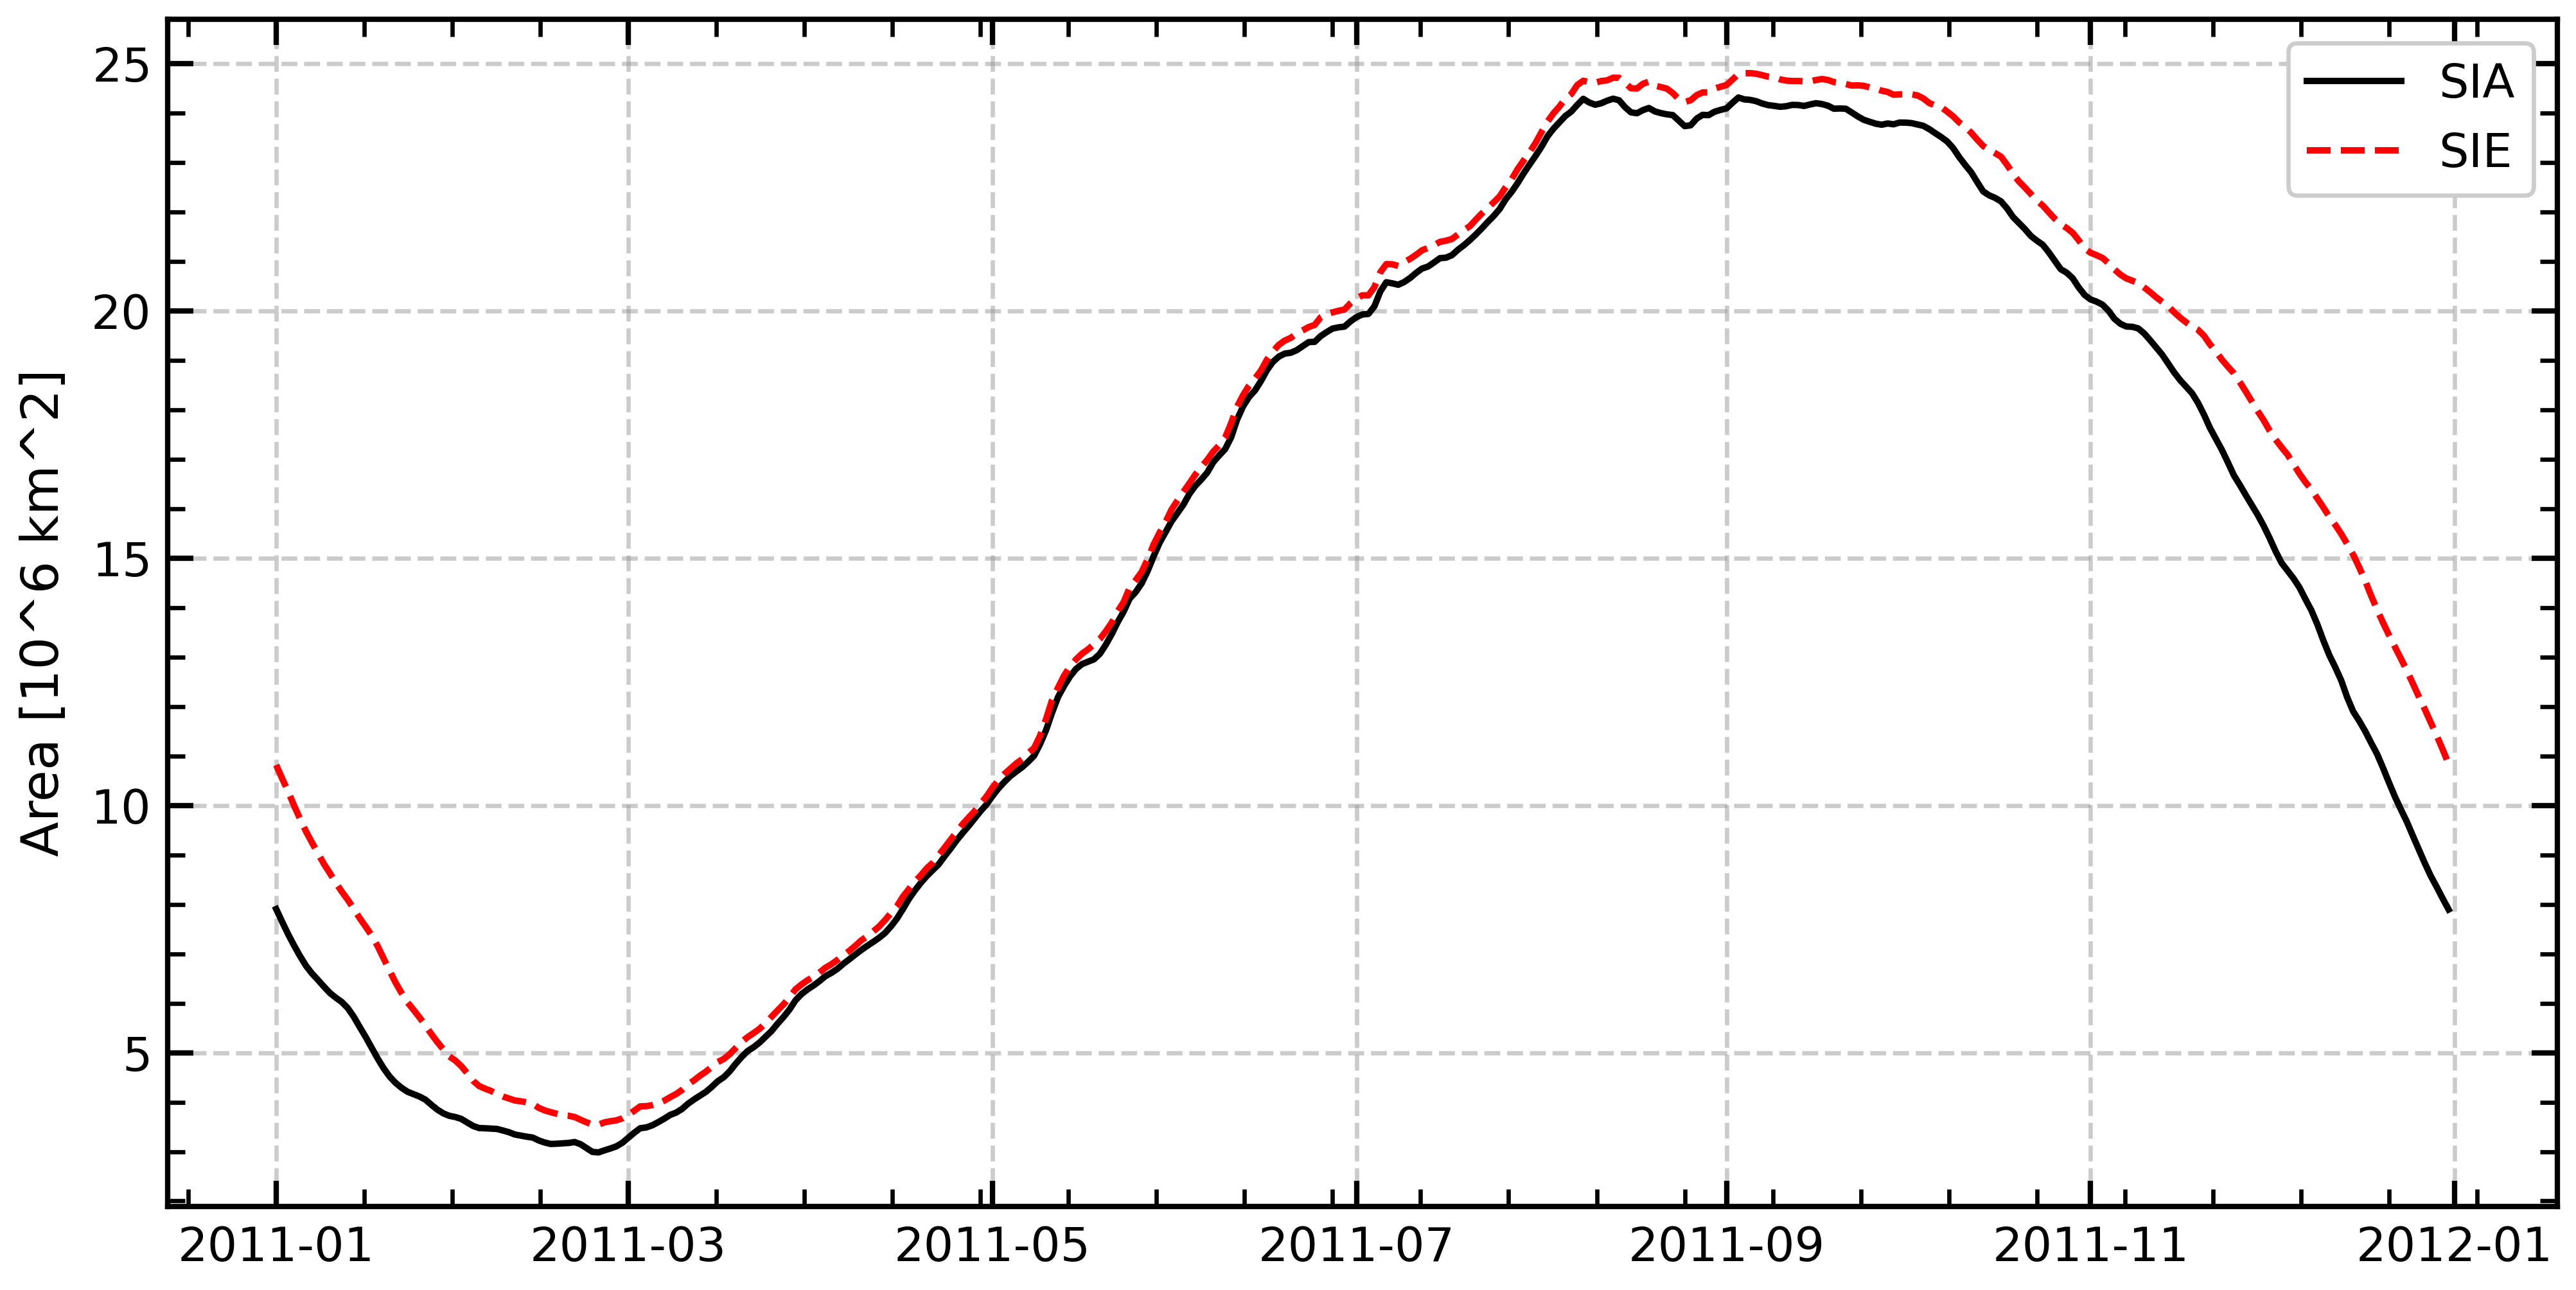

In [23]:
rc('text', usetex=False)

fig = plt.figure(figsize=[8, 4])
ax = fig.add_subplot(1, 1, 1)
ax.plot(file_dates, SIA, label="SIA")
ax.plot(file_dates, SIE, label="SIE")
ax.set(ylabel='Area [10^6 km^2]')
ax.legend()
#ax.set_xlabel(fontsize=3)
#set_ax_date(ax, plot_type="ts")
#plot(SIA)
t1 = file_dates[0].astype(datetime.datetime).strftime('%Y')
t2 = file_dates[-1].astype(datetime.datetime).strftime('%Y')
#ax.set_ylim((0,15.5))
#for i in range(len(jan1)):
#    ax.axvline(jan1[i], color='gray', alpha = 0.5)
    
#ax.set(xlim = (ax.get_xlim()[0], ax.get_xlim()[1]-700))
savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'sia_ts_025deg_'+t1+'_'+t2+'.png', dpi = 300)  

In [ ]:
df = pd.DataFrame({"date": np.array(pd.to_datetime(file_dates)),
                   "SIA": SIA,
                   "SIE": SIE,
                    })
#df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
dates = pd.to_datetime(df['date'].values, format='%Y-%m-%d')
df['month-day'] = dates.strftime('%m-%d')
df.drop(df[df['month-day'] == '02-29'].index, inplace = True)
df['month-day'] = pd.to_datetime(df['month-day'].values, format='%m-%d')
dates = pd.to_datetime(df['date'].values, format='%Y-%m-%d')
df['year'] = dates.strftime('%Y')
df['year'] = pd.to_datetime(df['year'].values, format='%Y')

savepath = '/g/data/ia40/sea-ice-classification/dataframes/'
savefilename = 'SIE_025deg_'+t1+'_'+t2+'.csv'
df.to_csv(savepath+savefilename)

In [ ]:
df['SIA'].shape
df['date'].shape
np.array(df['date'])
np.array(pd.to_datetime(df['date']))

In [ ]:
#fig, ax = plt.subplots((width, height))
df = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/SIE_025deg_2015_2016.csv') 
#df025 = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/SIA_ts_2019_2019_025deg.csv') 


fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.array(pd.to_datetime(df['date'])), np.array(df['SIA']))
ax.set(ylabel='Sea ice extent')
#ax.set_xlabel(fontsize=3)
#set_ax_date(ax, plot_type="ts")
#plot(SIA)
savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'sia_ts_025deg.png', dpi = 300)  

In [ ]:
pd.to_datetime(df['date'])

### ACCESS-OM2

In [ ]:
session = cc.database.create_session()
variable = 'aice_m'
expt = '1deg_jra55_iaf_omip2_cycle6'
var = cc.querying.getvar(expt, variable, session, start_time = '2010-01-01', decode_coords = False)
var['time'] = var.time.to_pandas() - timedelta(hours = 12)
area_t = cc.querying.getvar(expt, 'area_t',session,n = 1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
extent = (var > 0.15)*area_t
area = var*area_t

In [ ]:
SH_area = area.sel(yt_ocean = slice(-90, -45)).sum(('yt_ocean', 'xt_ocean'))
SH_extent = extent.sel(yt_ocean = slice(-90, -45)).sum(('yt_ocean', 'xt_ocean'))
SH_area.plot()

In [ ]:
# Calculate SIE from CICE-WIM output

In [ ]:
seasonal_cycle = SH_area.groupby('time.month').mean('time')
seasonal_cycle.plot()

In [ ]:
SH_area

In [ ]:
variable = 'aice_m'
expt = '025deg_jra55_iaf_omip2_cycle6'
var = cc.querying.getvar(expt, variable, session, start_time = '2010-01-01', decode_coords = False)
var['time'] = var.time.to_pandas() - timedelta(hours = 12)
area_t = cc.querying.getvar(expt, 'area_t',session,n = 1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
area = var*area_t
SH_area_025 = area.sel(yt_ocean = slice(-90, -45)).sum(('yt_ocean', 'xt_ocean'))
SH_area_025.plot()

In [ ]:
variable = 'aice_m'
expt = '01deg_jra55v140_iaf_cycle3'
var = cc.querying.getvar(expt, variable, session, start_time = '2010-01-01', decode_coords = False)
var['time'] = var.time.to_pandas() - timedelta(hours = 12)
area_t = cc.querying.getvar(expt, 'area_t',session,n = 1)
var.coords['ni'] = area_t['xt_ocean'].values
var.coords['nj'] = area_t['yt_ocean'].values
var = var.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
area = var*area_t
SH_area_01 = area.sel(yt_ocean = slice(-90, -45)).sum(('yt_ocean', 'xt_ocean'))
SH_area_01.plot()

### NSIDC

In [ ]:
from datetime import datetime, timedelta
df_SIE = pd.read_csv('/g/data/ia40/sea-ice-extent/seaice.csv') 
df_SIE
dates = []
timesteps, cols = df_SIE.shape
SIE_NSIDC = np.zeros(timesteps)
for idx in tqdm(range(timesteps), total = timesteps):
    temp_date = datetime(df_SIE['Year'].values[idx], df_SIE[' Month'].values[idx], df_SIE[' Day'].values[idx])
    dates.append(temp_date)
    SIE_NSIDC[idx] = df_SIE['     Extent'].values[idx]


### Plot a timeseries of area/extent

In [ ]:
# Read in all the datasets

In [ ]:
year = 2015

# CRTL
mypath = '/g/data/ia40/cice-dirs/runs/test/history/90day100mdaily/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'
onlyfiles = glob.glob("{path}/iceh.{year}*".format(path=mypath,year=year))
onlyfiles.sort()
#onlyfiles = onlyfiles[242:250]
file_dates_annual, SIE_annual, SIA_annual = calculate_sie(onlyfiles, timestep='daily')

In [ ]:
year = 2015

# CRTL
mypath = '/g/data/ia40/cice-dirs/runs/test/history/10day20mdaily/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'
onlyfiles = glob.glob("{path}/iceh.{year}*".format(path=mypath,year=year))
onlyfiles.sort()
#onlyfiles = onlyfiles[242:250]
file_dates_annual_10day20m, SIE_annual_10day20m, SIA_annual_10day20m = calculate_sie(onlyfiles, timestep='daily')

In [ ]:
year = 2015

# CRTL
mypath = '/g/data/ia40/cice-dirs/runs/test/history/10day100mdaily/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'
onlyfiles = glob.glob("{path}/iceh.{year}*".format(path=mypath,year=year))
onlyfiles.sort()
#onlyfiles = onlyfiles[242:250]
file_dates_annual_10day100m, SIE_annual_10day100m, SIA_annual_10day100m = calculate_sie(onlyfiles, timestep='daily')

In [ ]:
year = 2015

# CRTL
mypath = '/g/data/ia40/cice-dirs/runs/test/history/30day100mdaily/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'
onlyfiles = glob.glob("{path}/iceh.{year}*".format(path=mypath,year=year))
onlyfiles.sort()
#onlyfiles = onlyfiles[242:250]
file_dates_annual_30day100m, SIE_annual_30day100m, SIA_annual_30day100m = calculate_sie(onlyfiles, timestep='daily')

In [ ]:
dates_tmp = [datetime.datetime(2015,1,15), datetime.datetime(2015,2,15),datetime.datetime(2015,3,15),datetime.datetime(2015,4,15),
             datetime.datetime(2015,5,15),datetime.datetime(2015,6,15),datetime.datetime(2015,7,15),datetime.datetime(2015,8,15),
             datetime.datetime(2015,9,15),datetime.datetime(2015,10,15),datetime.datetime(2015,11,15),datetime.datetime(2015,12,15),
            ]
dates_tmp

In [ ]:
rc('text', usetex=False)

fig = plt.figure(figsize=[12, 6])
ax = fig.add_subplot(1, 1, 1)
ax.plot(file_dates_annual, SIE_annual, label='90day100m', color='red', linestyle='-')
ax.plot(file_dates_annual, SIA_annual, label='90day100m (SIA)', color='red', linestyle='--')
ax.plot(file_dates_annual_10day20m, SIE_annual_10day20m, label='10day20m', color='orange', linestyle='-')
ax.plot(file_dates_annual_10day20m, SIA_annual_10day20m, label='10day20m (SIA)', color='orange', linestyle='--')
ax.plot(file_dates_annual_10day100m, SIE_annual_10day100m, label='10day100m', color='purple', linestyle='-')
ax.plot(file_dates_annual_10day100m, SIA_annual_10day100m, label='10day100m (SIA)', color='purple', linestyle='--')
ax.plot(file_dates_annual_30day100m, SIE_annual_30day100m, label='30day100m', color='pink', linestyle='-')
ax.plot(file_dates_annual_30day100m, SIA_annual_10day300m, label='30day100m (SIA)', color='pink', linestyle='--')

ax.plot(dates[-365*4-150:-365*3-150], SIE_NSIDC[-365*4-150:-365*3-150], label='NSIDC', linestyle='-', color='black', linewidth=3)
df = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/SIE_10deg_2015_2019.csv') 
ax.plot(np.array(pd.to_datetime(df["date"][:365].values)), np.array(df["SIE"][:365]), label = '90day20m', color='blue')
ax.plot(np.array(pd.to_datetime(df["date"][:365].values)), np.array(df["SIA"][:365]), label = '90day20m (SIA)', color='blue')
ax.plot(SH_area.time[-49:-36], SH_area[-49:-36].values*0.000000000001, label='ACCESS-OM2-10 (cycle 6) (SIA)', linestyle='--', color='green')
ax.plot(SH_extent.time[-49:-36], SH_extent[-49:-36].values*0.000000000001, label='ACCESS-OM2-10 (cycle 6)', linestyle='-', color='green')
ax.set_ylabel("Sea ice extent [10^6 km^2]")
plt.legend()
plt.savefig('/home/566/nd0349/notebooks/figures/SIE_comparison4.png', dpi = 1000)

In [ ]:
#SIE_NSIDC
#dates
#np.array(pd.to_datetime(dates[-530:-90]))
rc('text', usetex=False)

fig = plt.figure(figsize=[10, 3])
ax = fig.add_subplot(1, 1, 1)
#ax.plot(np.array(pd.to_datetime(file_dates_annual, format="%Y-%m-%d"))+15, SIE_annual, label='10day100m')
#ax.plot(dates_tmp[0:len(SIE_annual)], SIE_annual, label='10day100m')
#ax.plot(dates_tmp[0:len(SIE_annual)], SIA_annual, label='10day100m (SIA)', color='k')
ax.plot(file_dates_annual, SIE_annual, label='10day100m')
ax.plot(file_dates_annual, SIA_annual, label='10day100m (SIA)', color='k')
ax.plot(dates[-365*4-150:-365*3-150], SIE_NSIDC[-365*4-150:-365*3-150], label='NSIDC', linestyle='-')
ax.plot(SH_area.time[-49:-36], SH_area[-49:-36].values*0.000000000001, label='ACCESS-OM2-10 (cycle 6)', linestyle='-')
df = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/SIE_10deg_2015_2019.csv') 
ax.plot(np.array(pd.to_datetime(df["date"][:365].values)), np.array(df["SIE"][:365]), label = 'CICE-WIM-10', color='red')
ax.plot(np.array(pd.to_datetime(df["date"][:365].values)), np.array(df["SIA"][:365]), label = 'CICE-WIM-10 (SIA)', color='red')
ax.plot(file_dates_annual, SIE_annual, label='10day100m')
ax.plot(file_dates_annual, SIA_annual, label='10day100m (SIA)', color='k')

ax.set_ylabel("Sea ice extent [10^6 km^2]")
plt.legend()
plt.savefig('/home/566/nd0349/notebooks/figures/SIE_comparison2.png', dpi = 1000)

In [ ]:
fig = plt.figure(figsize=[10, 3])
ax = fig.add_subplot(1, 1, 1)

sns.lineplot(ax=ax, x=np.array(pd.to_datetime(dates[-530:-90])), y=np.array(SIE_NSIDC[-530:-90]), linestyle = '-',
             errorbar=None, legend=True, palette='Spectral', label = 'NSIDC', #color = COLOR_MIZ
              )
dates_2018 = pd.date_range(start="2018-01-01",end="2018-12-31", freq='m')
sns.lineplot(ax=ax, x=SH_area.time[-12:], y=SH_area[-12:].values*0.000000000001, linestyle = '-',
             errorbar=None, legend=True, palette='Spectral', label = 'ACCESS-OM2-10 (cycle 6)', color = 'green'
              )
sns.lineplot(ax=ax, x=SH_area_025.time[-12:], y=SH_area_025[-12:].values*0.000000000001, linestyle = '--',
             errorbar=None, legend=True, palette='Spectral', label = 'ACCESS-OM2-025 (cycle 6)', color = 'green'
              )
sns.lineplot(ax=ax, x=SH_area_01.time[-12:], y=SH_area_01[-12:].values*0.000000000001, linestyle = 'dotted',
             errorbar=None, legend=True, palette='Spectral', label = 'ACCESS-OM2-01 (cycle 3)', color = 'green'
              )
df = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/SIE_10deg_2015_2019.csv') 
dates_df = pd.to_datetime(df["date"][-730:-365].values)
sns.lineplot(ax=ax, x=dates_df, y=df["SIA"][-730:-365], linestyle = '--',
             errorbar=None, legend=True, palette='Spectral', label = 'CICE-WIM-10 (SIA)', color = 'red'
              )
sns.lineplot(ax=ax, x=dates_df, y=df["SIE"][-730:-365], linestyle = '-',
             errorbar=None, legend=True, palette='Spectral', label = 'CICE-WIM-10', color = 'red'
              )

sns.lineplot(ax=ax, x=file_dates_annual, y=SIE_annual, linestyle = '-',
             errorbar=None, legend=True, palette='Spectral', label = 'CICE-WIM-10', color = 'red'
              )
#ax.plot(file_dates_annual,SIE_annual, label="SIE_annual", color='black', linestyle = '-')

ax.set(ylabel='Sea ice extent [10$^6$ km$^2$]', ylim=(0,25))

plt.savefig('/home/566/nd0349/notebooks/figures/SIE_comparison.png', dpi = 1000)

### Testing ocean restart

In [12]:
year = 2017

# CRTL
mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'
onlyfiles = glob.glob("{path}/iceh.{year}*".format(path=mypath,year=year))
#onlyfiles = glob.glob("{path}/iceh.*.nc".format(path=mypath))
onlyfiles.sort()
onlyfiles = onlyfiles[:-4]

mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history/'
os.chdir(mypath)
file_dates = []
year = 2018
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'
onlyfiles = glob.glob("{path}/iceh.*".format(path=mypath))
onlyfiles.sort()
onlyfiles = onlyfiles[-3*365:-1*365]

file_dates_restart, SIE_restart, SIA_restart = calculate_sie(onlyfiles, timestep='daily')

2017
730


100%|██████████| 730/730 [07:27<00:00,  1.63it/s]


In [5]:
year = 2015

# CRTL
mypath = '/g/data/ia40/cice-dirs/runs/test/history/30day100mdaily/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'
onlyfiles = glob.glob("{path}/iceh.{year}*".format(path=mypath,year=year))
onlyfiles.sort()
#onlyfiles = onlyfiles[242:250]
file_dates_annual, SIE_annual, SIA_annual = calculate_sie(onlyfiles, timestep='daily')

2015
365


100%|██████████| 365/365 [02:48<00:00,  2.16it/s]


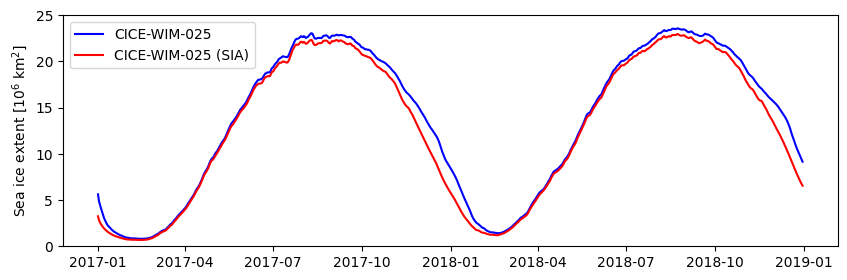

In [13]:
fig = plt.figure(figsize=[10, 3])
ax = fig.add_subplot(1, 1, 1)

sns.lineplot(ax=ax, x=file_dates_restart, y=SIE_restart, linestyle = '-',
             errorbar=None, legend=True, palette='Spectral', label = 'CICE-WIM-025', color = 'blue'
              )
sns.lineplot(ax=ax, x=file_dates_restart, y=SIA_restart, linestyle = '-',
             errorbar=None, legend=True, palette='Spectral', label = 'CICE-WIM-025 (SIA)', color = 'red'
              )


#ax.plot(file_dates_annual,SIE_annual, label="SIE_annual", color='black', linestyle = '-')

ax.set(ylabel='Sea ice extent [10$^6$ km$^2$]', ylim=(0,25))
#ax.set(xlim = (ax.get_xlim()[0]+350, ax.get_xlim()[1]))
plt.savefig('/home/566/nd0349/notebooks/figures/SIE_comparison_restart_025_2017_2018.png', dpi = 1000)

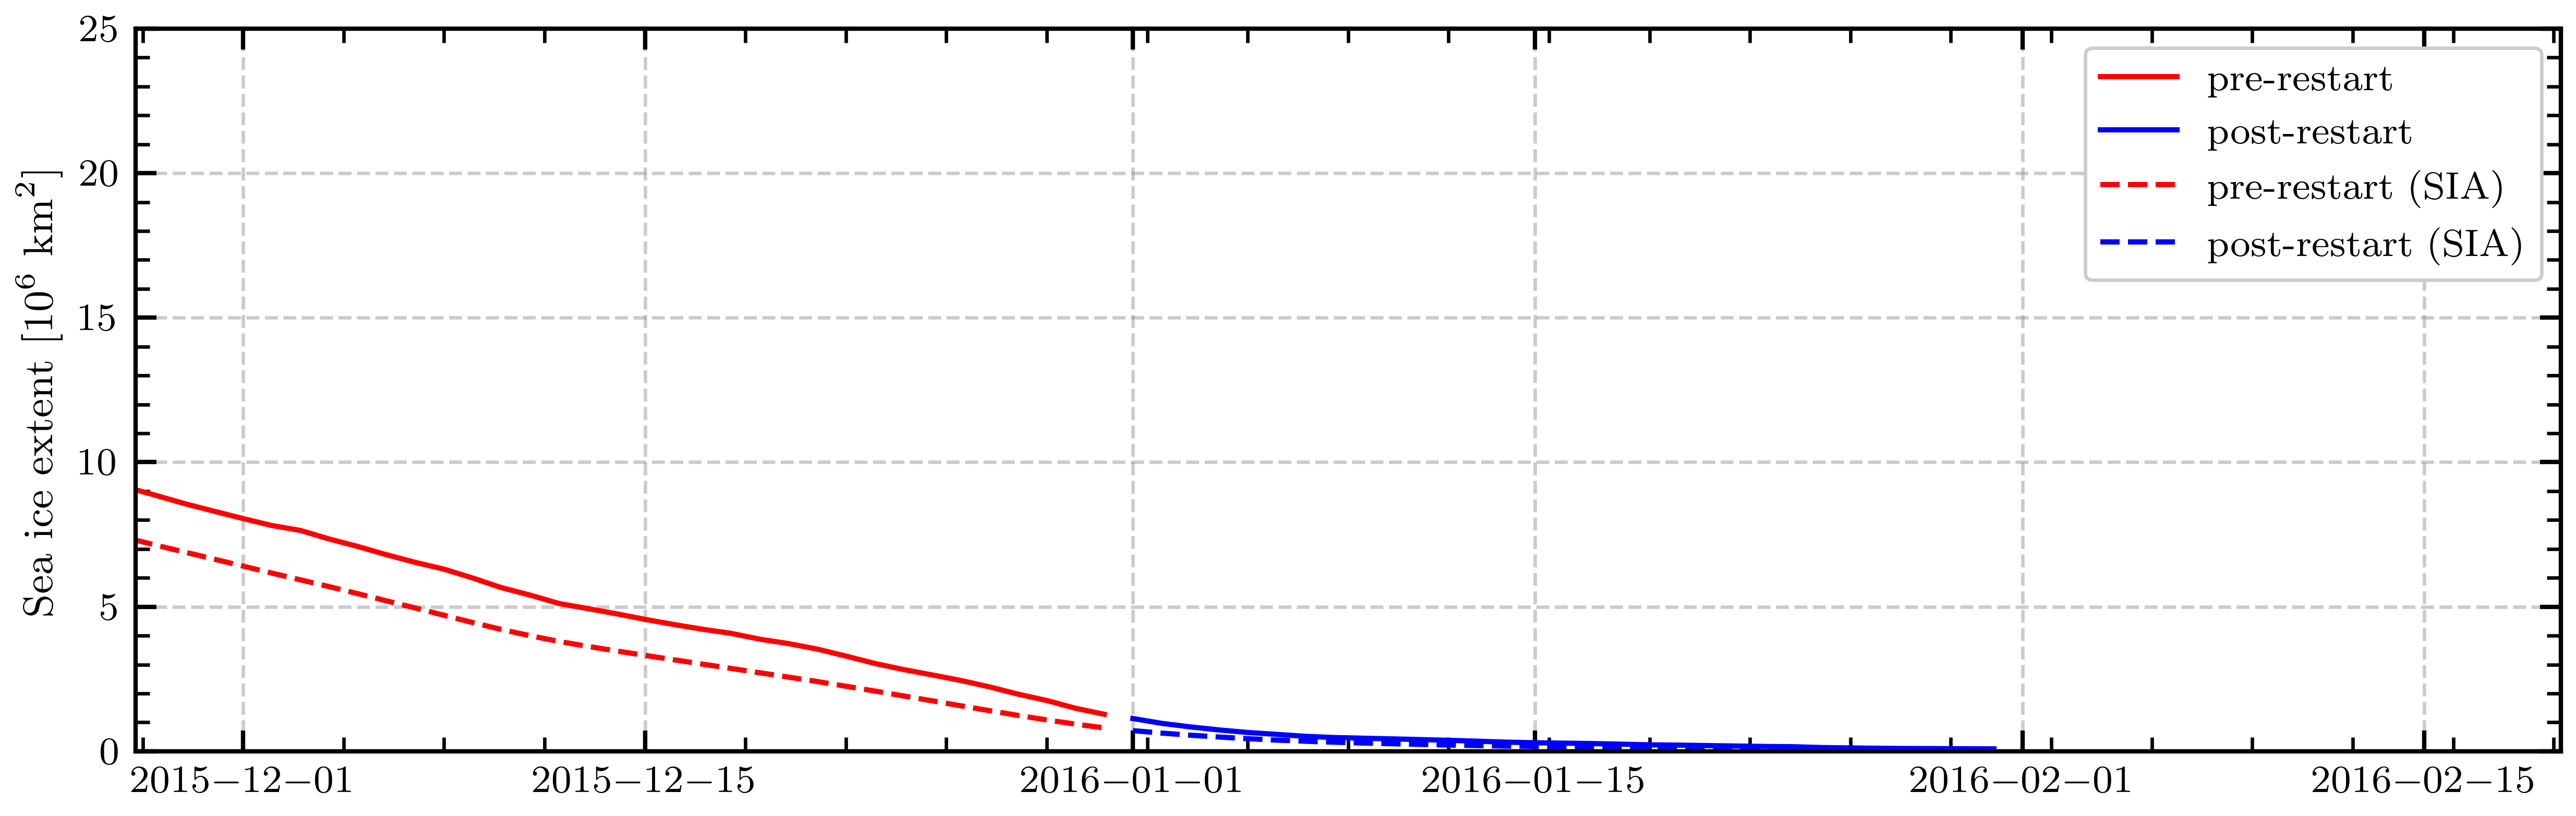

In [18]:
fig = plt.figure(figsize=[10, 3])
ax = fig.add_subplot(1, 1, 1)

sns.lineplot(ax=ax, x=file_dates_annual, y=SIE_annual, linestyle = '-',
             errorbar=None, legend=True, palette='Spectral', label = 'pre-restart', color = 'red'
              )

sns.lineplot(ax=ax, x=file_dates_restart, y=SIE_restart, linestyle = '-',
             errorbar=None, legend=True, palette='Spectral', label = 'post-restart', color = 'blue'
              )

sns.lineplot(ax=ax, x=file_dates_annual, y=SIA_annual, linestyle = '--',
             errorbar=None, legend=True, palette='Spectral', label = 'pre-restart (SIA)', color = 'red'
              )

sns.lineplot(ax=ax, x=file_dates_restart, y=SIA_restart, linestyle = '--',
             errorbar=None, legend=True, palette='Spectral', label = 'post-restart (SIA)', color = 'blue'
              )
#ax.plot(file_dates_annual,SIE_annual, label="SIE_annual", color='black', linestyle = '-')

ax.set(ylabel='Sea ice extent [10$^6$ km$^2$]', ylim=(0,25))
ax.set(xlim = (ax.get_xlim()[0]+350, ax.get_xlim()[1]))
plt.savefig('/home/566/nd0349/notebooks/figures/SIE_comparison_restart.png', dpi = 1000)

In [12]:
ax.get_xlim()[1]

16850.75

### CICE-WIM-025

### Plot maps of sea ice concentration


In [ ]:
sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av
COLOR = 'black'

year = 2015



fig = plt.figure(figsize=[10, 4])
#ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
#ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo())

ax1.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
ax2.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.LAND)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = True

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = True


cmap = cmo.thermal#plt.cm.get_cmap("jet") # cmo.ice

# define the bins and normalize
bounds = [0, .15, 0.8, 0.9, 0.95, 0.98,0.99, 1.0]# np.linspace(0, 3, 4)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
filename = mypath + 'iceh.' + str(year) + '-09-01.nc'
ds = xr.open_dataset(filename)

var = 'aice'
cs = ax1.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
                    norm = norm,
                    vmin=0, vmax=1)#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax1)
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([pos1.x0 + pos1.width + 0.05, pos1.y0, pos1.height/20, pos1.height])
#cbar = ax1.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Ice concentration [-]')
temp = filename.partition('.')[2]
#fig.suptitle(temp.partition('.')[0], fontsize=15, x=0.5, y = 1.01)
#ax1.title.set_text(temp.partition('.')[0])
ax1.title.set_text('CICE-WIM-10')

print('ax1 done')
mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history/'
filename = mypath + 'iceh.' + str(year) + '-09-01.nc'
ds = xr.open_dataset(filename)
var = 'aice'
cs = ax2.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
                    norm = norm,
                    vmin=0, vmax=1)#
fig.colorbar(cs, ax=ax2)
temp = filename.partition('.')[2]

ax2.title.set_text('CICE-WIM-025')
print('ax2 done')




plot_dir = '/home/566/nd0349/notebooks'
plt.savefig(plot_dir + '/' + 'aice-10-025-southpolestero.png', dpi=1000)
plt.savefig(plot_dir + '/' + 'aice-10-025.pdf')#, dpi = 300, transparent=False)
plt.show()


# Changing ocean settings

### Sea ice extent

In [ ]:
year = 2015

# CRTL
mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-09-01.nc'
onlyfiles = glob.glob("{path}/iceh.{year}*".format(path=mypath,year=year))
onlyfiles.sort()
onlyfiles = onlyfiles[242:250]
file_dates_ctrl, SIE, SIA = calculate_sie(onlyfiles)

# 90 day restoring time with 20 metre depth
mypath = '/g/data/ia40/cice-dirs/runs/test/history/90day20m/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-09-01.nc'
onlyfiles = glob.glob("{path}/iceh.*".format(path=mypath))
onlyfiles.sort()

file_dates, SIE_90day20m, SIA_90day20m = calculate_sie(onlyfiles)

# 90 day restoring time with 100 metre depth
mypath = '/g/data/ia40/cice-dirs/runs/test/history/90day100m/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-09-01.nc'
onlyfiles = glob.glob("{path}/iceh.*".format(path=mypath))
onlyfiles.sort()

file_dates, SIE_90day100m, SIA_90day100m = calculate_sie(onlyfiles)

# 10 day restoring time with 20 metre depth
mypath = '/g/data/ia40/cice-dirs/runs/test/history/10day20m/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-09-01.nc'
onlyfiles = glob.glob("{path}/iceh.*".format(path=mypath))
onlyfiles.sort()

file_dates, SIE_10day20m, SIA_10day20m = calculate_sie(onlyfiles)

# 10 day restoring time with 100 metre depth
mypath = '/g/data/ia40/cice-dirs/runs/test/history/10day100m/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-09-01.nc'
onlyfiles = glob.glob("{path}/iceh.*".format(path=mypath))
onlyfiles.sort()

file_dates, SIE_10day100m, SIA_10day100m = calculate_sie(onlyfiles)

# 10 day restoring time with 100 metre depth - CONTINUE
mypath = '/g/data/ia40/cice-dirs/runs/test/history/10day100m_continue/'
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-09-01.nc'
onlyfiles = glob.glob("{path}/iceh.*".format(path=mypath))
onlyfiles.sort()

file_dates, SIE_10day100m_cont, SIA_10day100m_cont = calculate_sie(onlyfiles)

In [ ]:
file = '/g/data/ia40/cice-dirs/runs/test/history/90day100m/iceh_ic.2015-09-01-03600.nc'
ds = xr.open_dataset(file)
ds2 = xr.open_dataset(file)
aice = ds.aice
lat = ds.TLAT
dA = ds.HTE
dA_south = dA.where(lat<0, drop=True)
# First take only the southern hemisphere
aice_south = (ds.aice.where(lat<0, drop=True)).squeeze() 
# Then take all ice exceeding the ice edge
aice_only= aice_south.where(aice_south>0.15, drop=True) 

tarea_south = (ds.tarea.where(lat<0, drop=True))
tarea_aice_only = tarea_south.where(aice_south>0.15, drop=True)
weights = tarea_south#np.multiply(hte_south, aice_south)
weights.name = "Areal weights"

aice_weighted = aice_south.weighted(weights)
SIA_ic = (aice_weighted.sum(("nj", "ni")).values)/(10**12)
SIE_ic = (tarea_aice_only.sum(("nj", "ni")).values)/(10**12)

file = '/g/data/ia40/cice-dirs/runs/test/restart/iced.2015-09-01-00000.nc'
ds = xr.open_dataset(file)
aice = ds.aicen.sum(axis=0)[1:-1,1:-1]
lat = ds2.TLAT
dA = ds2.HTE
tarea = ds2.tarea
dA_south = dA.where(lat<0, drop=True)
# First take only the southern hemisphere
aice_south = (aice.where(lat<0, drop=True)).squeeze() 
# Then take all ice exceeding the ice edge
aice_only= aice_south.where(aice_south>0.15, drop=True) 

tarea_south = (tarea.where(lat<0, drop=True))
tarea_aice_only = tarea_south.where(aice_south>0.15, drop=True)
weights = tarea_south#np.multiply(hte_south, aice_south)
weights.name = "Areal weights"

aice_weighted = aice_south.weighted(weights)
SIA_restart = (aice_weighted.sum(("nj", "ni")).values)/(10**12)
SIE_restart = (tarea_aice_only.sum(("nj", "ni")).values)/(10**12)

In [ ]:
onlyfiles

In [ ]:
ds.aicen.sum(axis=0)[1:-1,1:-1].shape
SIE_restart

In [ ]:

fig = plt.figure(figsize=[10, 4])
ax = fig.add_subplot(1, 1, 1)
ax.plot(file_dates_annual,SIE_annual, label="SIE_annual", color='black', linestyle = '-')


In [ ]:
#SIE_90day20m.plot()
rc('text', usetex=False)
file_dates

fig = plt.figure(figsize=[8, 4])
ax = fig.add_subplot(1, 1, 1)

ax.plot(file_dates_ctrl, SIE, label="CTRL", color='gray')
ax.plot(np.concatenate(([file_dates[0]], file_dates), axis=0), np.concatenate(([SIE_ic], SIE_90day20m), axis=0), label="SIE_90day20m", color='red')
ax.plot(np.concatenate(([file_dates[0]], file_dates), axis=0), np.concatenate(([SIE_ic], SIE_90day100m), axis=0), label="SIE_90day100m", color='green', linestyle = 'dashdot')
ax.plot(np.concatenate(([file_dates[0]], file_dates), axis=0), np.concatenate(([SIE_ic], SIE_10day20m), axis=0), label="SIE_10day20m", color='blue', linestyle = '-')
ax.plot(np.concatenate(([file_dates[0]], file_dates), axis=0), np.concatenate(([SIE_ic], SIE_10day100m), axis=0), label="SIE_10day100m", color='orange', linestyle = '-.')
ax.plot(np.concatenate(([file_dates[0]], file_dates), axis=0), np.concatenate(([SIE_restart], SIE_10day100m_cont), axis=0), label="SIE_10day100m_continue", color='yellow', linestyle = 'dotted')
#ax.plot(file_dates_annual,SIE_annual, label="SIE_annual", color='black', linestyle = '-')


ax.scatter(file_dates[0], SIE_ic, label="Initial conditions", color='purple')
ax.set_ylim((16,24))
ax.set_ylabel('Sea ice extent [10^6 km^2]')
plt.legend()

plt.savefig('/home/566/nd0349/notebooks/figures/SIE_comparison_ocn_settings.png', dpi = 1000)

In [ ]:
file_dates_annual

In [ ]:
#SIE_90day20m.plot()
rc('text', usetex=False)
file_dates

fig = plt.figure(figsize=[8, 4])
ax = fig.add_subplot(1, 1, 1)

ax.plot(file_dates_ctrl, SIA, label="CTRL", color='gray')
ax.plot(np.concatenate(([file_dates[0]], file_dates), axis=0), np.concatenate(([SIA_ic], SIA_90day20m), axis=0), label="SIA_90day20m", color='red')
ax.plot(np.concatenate(([file_dates[0]], file_dates), axis=0), np.concatenate(([SIA_ic], SIA_90day100m), axis=0), label="SIA_90day100m", color='green', linestyle = 'dashdot')
ax.plot(np.concatenate(([file_dates[0]], file_dates), axis=0), np.concatenate(([SIA_ic], SIA_10day20m), axis=0), label="SIA_10day20m", color='blue', linestyle = '-')
ax.plot(np.concatenate(([file_dates[0]], file_dates), axis=0), np.concatenate(([SIA_ic], SIA_10day100m), axis=0), label="SIA_10day100m", color='orange', linestyle = '-.')
ax.plot(np.concatenate(([file_dates[0]], file_dates), axis=0), np.concatenate(([SIA_restart], SIA_10day100m_cont), axis=0), label="SIA_10day100m_continue", color='yellow', linestyle = 'dotted')


ax.scatter(file_dates[0], SIA_ic, label="Initial conditions", color='purple')
ax.set_ylim((16,24))
ax.set_ylabel('Sea ice area [10^6 km^2]')
plt.legend()

plt.savefig('/home/566/nd0349/notebooks/figures/SIA_comparison_ocn_settings.png', dpi = 1000)

### Maps of differences between runs

FileNotFoundError: [Errno 2] No such file or directory: b'/g/data/ia40/cice-dirs/runs/waves-10/history/archive/iceh.2011-09-03.nc'

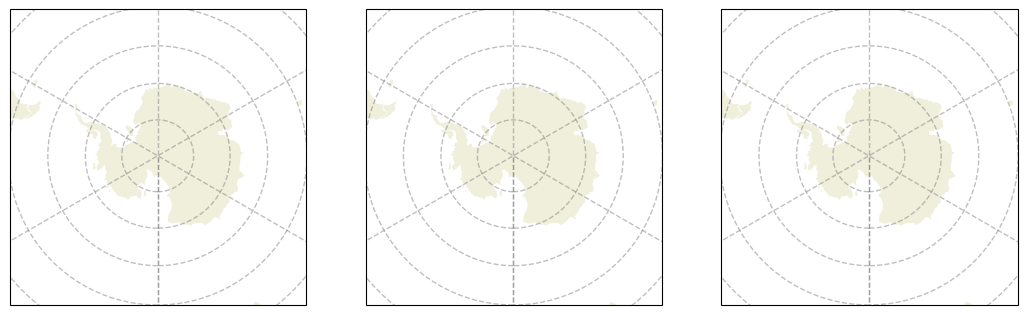

In [3]:
sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av
COLOR = 'black'
year = 2011

fig = plt.figure(figsize=[13, 4])
#ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
#ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

ax1 = fig.add_subplot(1, 3, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.SouthPolarStereo())

ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax2.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax3.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.LAND)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True


cmap = cmo.balance#plt.cm.get_cmap("jet") # cmo.ice

# define the bins and normalize
bounds = [-1, -0.5, -0.005, 0.005, 0.5, 1.0]# np.linspace(0, 3, 4)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
filename = mypath + 'iceh.' + str(year) + '-09-03.nc'
ds1 = xr.open_dataset(filename)
mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/archive/'
filename = mypath + 'iceh.' + str(year) + '-09-03.nc'
ds2 = xr.open_dataset(filename)

var = 'aice'
cs = ax1.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds1[var][0,:,:]-ds2[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
#                    norm = norm,
                    vmin=-1, vmax=1)#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax1)
#cbar = ax1.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax1.title.set_text('CTRL-90day20m')

#mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
#filename = mypath + 'iceh.' + str(year) + '-09-03.nc'
mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
filename = mypath + 'iceh.' + str(year) + '-09-03.nc'
ds1 = xr.open_dataset(filename)
mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/archive/'
filename = mypath + 'iceh.' + str(year) + '-09-03.nc'
ds2 = xr.open_dataset(filename)

var = 'aice'
cs = ax2.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds1[var][0,:,:]-ds2[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
#                    norm = norm,
                    vmin=-1, vmax=1)#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax2)
#cbar = ax2.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax2.title.set_text('CTRL-10day100m')



mypath = '/g/data/ia40/cice-dirs/runs/test/history/90day20m/'
filename = mypath + 'iceh.' + str(year) + '-09-03.nc'
ds1 = xr.open_dataset(filename)
mypath = '/g/data/ia40/cice-dirs/runs/test/history/10day100m/'
filename = mypath + 'iceh.' + str(year) + '-09-03.nc'
ds2 = xr.open_dataset(filename)

var = 'aice'
cs = ax3.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds1[var][0,:,:]-ds2[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
#                    norm = norm,
                    vmin=-1, vmax=1)#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax3)
#cbar = ax2.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax3.title.set_text('90day20m-10day20m')



plot_dir = '/home/566/nd0349/notebooks'
plt.savefig(plot_dir + '/' + 'differences-aice.png', dpi=1000)
#plt.savefig(plot_dir + '/' + 'aice-10-025.pdf')#, dpi = 300, transparent=False)
plt.show()


In [ ]:
sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av
COLOR = 'black'
year = 2015

fig = plt.figure(figsize=[13, 4])
#ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
#ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

ax1 = fig.add_subplot(1, 3, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.SouthPolarStereo())

ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax2.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax3.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.LAND)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True

cmap = cmo.ice#plt.cm.get_cmap("jet") # cmo.ice
bounds = [0, .15, 0.8, 0.9, 0.95, 0.98,0.99, 1.0]# np.linspace(0, 3, 4)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


#cmap = cmo.ice#plt.cm.get_cmap("jet") # cmo.ice
cmap2 = cmo.balance
# define the bins and normalize
#bounds = [-1, -0.5, -0.005, 0.005, 0.5, 1.0]# np.linspace(0, 3, 4)
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

mypath = '/g/data/ia40/cice-dirs/runs/test/history/10day20mdaily/'
filename = mypath + 'iceh.' + str(year) + '-07-15.nc'
ds1 = xr.open_dataset(filename)

var = 'aice'
cs = ax1.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds1[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
                    norm = norm,
                    #vmin=-1, vmax=1
                   )#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax1)
#cbar = ax1.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax1.title.set_text('10day20m')

#mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
#filename = mypath + 'iceh.' + str(year) + '-09-03.nc'

mypath = '/g/data/ia40/cice-dirs/runs/test/history/'
filename = mypath + 'iceh.' + str(year) + '-07-15.nc'
ds2 = xr.open_dataset(filename)

var = 'aice'
cs = ax2.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds2[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
                    norm = norm,
                    #vmin=-1, vmax=1
                   )#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax2)
#cbar = ax2.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax2.title.set_text('10day100m')



mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
filename = mypath + 'iceh.' + str(year) + '-07-15.nc'
ds1 = xr.open_dataset(filename)
mypath = '/g/data/ia40/cice-dirs/runs/test/history/'
filename = mypath + 'iceh.' + str(year) + '-07-15.nc'
ds2 = xr.open_dataset(filename)

var = 'aice'
cs = ax3.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds2[var][0,:,:]-ds1[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap2,
#                    norm = norm,
                    vmin=-1, vmax=1)#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax3)
#cbar = ax2.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax3.title.set_text('10day100m-10day20m')



plot_dir = '/home/566/nd0349/notebooks'
plt.savefig(plot_dir + '/' + 'differences-aice-july.png', dpi=1000)
#plt.savefig(plot_dir + '/' + 'aice-10-025.pdf')#, dpi = 300, transparent=False)
plt.show()


In [ ]:
ds1[var][0,:,:] * (ds1['aice'][0,:,:]> 0.15)

In [ ]:
sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av
COLOR = 'black'
year = 2015

fig = plt.figure(figsize=[13, 4])
#ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
#ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

ax1 = fig.add_subplot(1, 3, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.SouthPolarStereo())

ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax2.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax3.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.LAND)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True

cmap = cmo.thermal #plt.cm.get_cmap("jet") # cmo.ice
bounds = [0, 0.01, 0.1, 0.5, 1, 2, 3]
#[0,1, 10,100,200, 500, 1000]
#[0, 0.01, 0.1, 0.5, 1, 2, 3] #[0,1, 10,100,200, 500, 1000] #[0, .15, 0.8, 0.9, 0.95, 0.98,0.99, 1.0]# np.linspace(0, 3, 4)
norm = mpl.colors.Normalize(vmin=0, vmax=3)
#colors.LogNorm(vmin=1, vmax=1000)
#mpl.colors.Normalize(vmin=0, vmax=3)
#mpl.colors.BoundaryNorm(bounds, cmap.N)
#colors.LogNorm(vmin=1, vmax=1000) #mpl.colors.BoundaryNorm(bounds, cmap.N)


#cmap = cmo.ice#plt.cm.get_cmap("jet") # cmo.ice
cmap2 = cmo.balance
# define the bins and normalize
#bounds = [-1, -0.5, -0.005, 0.005, 0.5, 1.0]# np.linspace(0, 3, 4)
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


mypath = '/g/data/ia40/cice-dirs/runs/test/history/10day20mdaily/'
filename = mypath + 'iceh.' + str(year) + '-07-15.nc'
ds1 = xr.open_dataset(filename)

var = 'hi'
cs = ax1.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds1[var][0,:,:] * (ds1['aice'][0,:,:]> 0.15),
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
                    norm = norm,
                    #vmin=-1, vmax=1
                   )#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax1)
#cbar = ax1.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax1.title.set_text('10day20m')

#mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
#filename = mypath + 'iceh.' + str(year) + '-09-03.nc'

mypath = '/g/data/ia40/cice-dirs/runs/test/history/'
filename = mypath + 'iceh.' + str(year) + '-07-15.nc'
ds2 = xr.open_dataset(filename)


cs = ax2.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds2[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
                    norm = norm,
                    #vmin=-1, vmax=1
                   )#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax2)
#cbar = ax2.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax2.title.set_text('10day100m')



mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
filename = mypath + 'iceh.' + str(year) + '-07-15.nc'
ds1 = xr.open_dataset(filename)
mypath = '/g/data/ia40/cice-dirs/runs/test/history/'
filename = mypath + 'iceh.' + str(year) + '-07-15.nc'
ds2 = xr.open_dataset(filename)


cs = ax3.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds2[var][0,:,:]-ds1[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap2,
#                    norm = norm,
                    vmin=-2, vmax=2)#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax3)
#cbar = ax2.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax3.title.set_text('10day100m-10day20m')



plot_dir = '/home/566/nd0349/notebooks'
plt.savefig(plot_dir + '/' + 'differences-'+var+'-july.png', dpi=1000)
#plt.savefig(plot_dir + '/' + 'aice-10-025.pdf')#, dpi = 300, transparent=False)
plt.show()

# Testing SST

'2010-01-02'

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: User

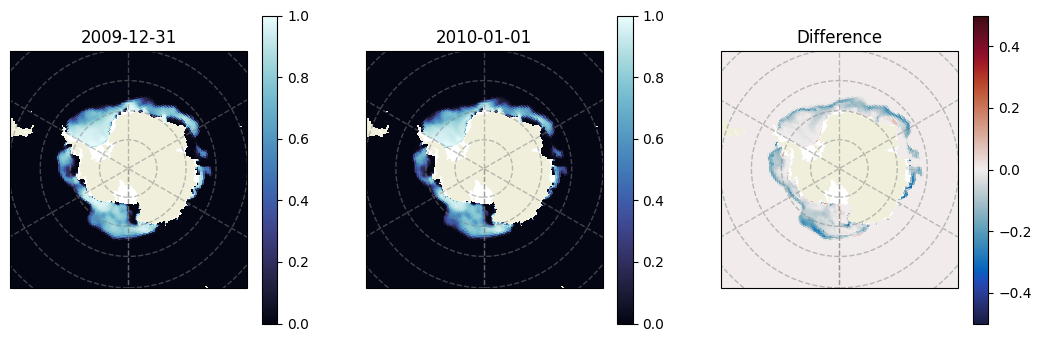

In [11]:
sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av
COLOR = 'black'
year = 2010

fig = plt.figure(figsize=[13, 4])
#ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
#ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

ax1 = fig.add_subplot(1, 3, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.SouthPolarStereo())


ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax2.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax3.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())


ax1.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.LAND)


gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True

gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = False
gl.ylabels_left = False
gl.ylabels_right = False
gl.xlines = True



cmap = cmo.ice #plt.cm.get_cmap("jet") # cmo.ice
bounds = [-10, -5, -3, -2, -1, 0, 1, 2, 3, 5, 10]
#[0,1, 10,100,200, 500, 1000]
#[0, 0.01, 0.1, 0.5, 1, 2, 3] #[0,1, 10,100,200, 500, 1000] #[0, .15, 0.8, 0.9, 0.95, 0.98,0.99, 1.0]# np.linspace(0, 3, 4)
norm = mpl.colors.Normalize(vmin=-0, vmax=1)
#colors.LogNorm(vmin=1, vmax=1000)
#mpl.colors.Normalize(vmin=0, vmax=3)
#mpl.colors.BoundaryNorm(bounds, cmap.N)
#colors.LogNorm(vmin=1, vmax=1000) #mpl.colors.BoundaryNorm(bounds, cmap.N)


#cmap = cmo.ice#plt.cm.get_cmap("jet") # cmo.ice
#cmap = cmo.balance
# define the bins and normalize
#bounds = [-1, -0.5, -0.005, 0.005, 0.5, 1.0]# np.linspace(0, 3, 4)
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

case = 'waves-10'
mypath = '/g/data/ia40/cice-dirs/runs/' + case + '/history/'
filename = mypath + 'iceh.' + str(year-1) + '-12-31.nc'
ds1 = xr.open_dataset(filename)

var = 'aice'
cs = ax1.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds1[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
                    norm = norm,
                    #vmin=-1, vmax=1
                   )#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax1)
#cbar = ax1.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax1.title.set_text(filename[-13:-3])

mypath = '/g/data/ia40/cice-dirs/runs/' + case + '/history/'
filename = mypath + 'iceh.' + str(year) + '-01-01.nc'
ds2 = xr.open_dataset(filename)

cs = ax2.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds2[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
                    norm = norm,
                    #vmin=-1, vmax=1
                   )#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax2)
#cbar = ax1.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax2.title.set_text(filename[-13:-3])



mypath = '/g/data/ia40/cice-dirs/runs/' + case + '/history/'
filename = mypath + 'iceh.' + str(year) + '-01-02.nc'
ds3 = xr.open_dataset(filename)


cs = ax3.pcolormesh(ds1['TLON'][:,:],ds1['TLAT'][:,:],ds2[var][0,:,:]-ds1[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmo.balance,
                    #norm = norm,
                    vmin=-0.5, vmax=0.5
                   )#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax3)
#cbar = ax2.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Difference in ice concentration [-]')
ax3.title.set_text('Difference')


plot_dir = '/home/566/nd0349/notebooks'
plt.savefig(plot_dir + '/' + 'cont_test-'+var+'-'+str(year)+'-Dec31-Jan_2.png', dpi=1000)
#plt.savefig(plot_dir + '/' + 'aice-10-025.pdf')#, dpi = 300, transparent=False)
plt.show()

### Areal total graphs

In [3]:
def integrate_antarctica(filenames, var, timestep='daily'):
    ds = xr.open_dataset(filenames[0])
    LN = ds.TLON.values
    LT = ds.TLAT.values
    lat_idx = LT[:,0] < 0
    # Initialise arrays
    n_lon,n_lat = LN.shape
    n_days = len(filenames)
    print(n_days)
    SIA = np.empty((n_days))
    SIE = np.empty((n_days))
    
    # Open the file
    for idx, file in tqdm(enumerate(filenames), total = len(filenames)):
        #print(file)
#        if timestep == 'daily':
#            file_dates.append(np.datetime64(file[-13:-3]))
#        elif timestep == 'monthly':
#             file_dates.append(np.datetime64(file[-10:-3]))
        ds = xr.open_dataset(file)
        aice = ds[var]
        lat = ds.TLAT
        dA = ds.HTE
        dA_south = dA.where(lat<0, drop=True)
        # First take only the southern hemisphere
        aice_south = (ds[var].where(lat<0, drop=True)).squeeze() 
        # Then take all ice exceeding the ice edge
        aice_only= aice_south.where(aice_south>0.15, drop=True) 
    
        tarea_south = (ds.tarea.where(lat<0, drop=True))
        tarea_aice_only = tarea_south.where(aice_south>0.15, drop=True)
        weights = tarea_south#np.multiply(hte_south, aice_south)
        weights.name = "Areal weights"
    
        aice_weighted = aice_south.weighted(weights)
        SIA[idx] = (aice_weighted.sum(("nj", "ni")).values)/(10**12)
        SIE[idx] = (tarea_aice_only.sum(("nj", "ni")).values)/(10**12)
    return (SIE, SIA)

In [8]:
# import sys
# from tqdm import tqdm
# from os import listdir
# from os.path import isfile, join
# rc('text', usetex=True)
year = 2011
case = 'waves-025'
mypath = '/g/data/ia40/cice-dirs/runs/' + case + '/history/'
#os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-09-01.nc'
onlyfiles1 = glob.glob("{path}/iceh.{year}*".format(path=mypath, year=year))
onlyfiles1.sort()

year = 2012
case = 'waves-025'
mypath = '/g/data/ia40/cice-dirs/runs/' + case + '/history/'
onlyfiles2 = glob.glob("{path}/iceh.{year}*".format(path=mypath, year=year))
onlyfiles2.sort()

filenames = onlyfiles1[-5:] + onlyfiles2[0:10]
filenames


var = 'sst'
SIE, SIA = integrate_antarctica(filenames, var)
SIA
file_dates = []
for file in filenames:
    file_dates.append(np.datetime64(file[-13:-3]))
SIA

2011
15


100%|██████████| 15/15 [00:08<00:00,  1.67it/s]


array([3957.27978732, 3966.33196777, 3974.62018091, 3983.14246976,
       3992.59086094, 4002.35493222, 4011.07774236, 4019.20945763,
       4028.13225219, 4036.64970921, 4044.38843497, 4050.57130883,
       4055.94189699, 4061.04270753, 4066.61838039])

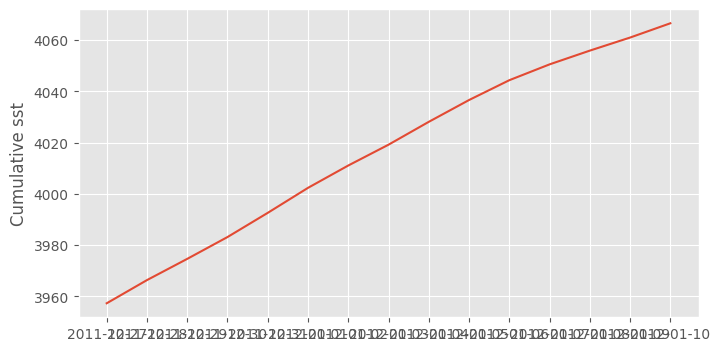

In [9]:
plt.style.use('ggplot')
fig = plt.figure(figsize=[8, 4])
ax = fig.add_subplot(1, 1, 1)

sns.lineplot(ax=ax, x=file_dates, y=SIA)
ax.set(ylabel='Cumulative ' +var)
ax.set_xticks(file_dates)
ax.set_xticklabels(file_dates, rotation=00)
#ax.set_ylim((0,175))
#plt.axvline(x=file_dates[-2]-0.5, linestyle = '--')

#plt.xticks(x, labels, rotation='vertical')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.savefig('/home/566/nd0349/notebooks/' + var + '-' + str(year) + '-cont-fixed.png', dpi = 1000, transparent=False)
plt.show()

In [117]:
year = 2011
case = 'test'
mypath = '/g/data/ia40/cice-dirs/runs/' + case + '/history/'
onlyfiles2 = glob.glob("{path}/iceh.{year}*".format(path=mypath, year=year))
onlyfiles2.sort()
onlyfiles2

['/g/data/ia40/cice-dirs/runs/test/history/iceh.2011-01-01.nc']

# Movie

In [ ]:
filenames = sorted(onlyfiles)
filenames

In [ ]:
from PIL import Image
import sys
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
import IPython.display
rc('text', usetex=True)

#mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history' #'/g/data/dy43/cice-dirs/runs/nowaves/history/' + year
mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) if f.startswith("iceh."+str(year))]
filenames = sorted(onlyfiles)
#filenames = filenames[0:24:1]
plot_dir = '/home/566/nd0349/notebooks/figures/gif'
year = 2010
#filenames = filenames[0::5]
var = 'aice'
print(filenames[0])
print(filenames[-1])

cmap = cmo.ice#plt.cm.get_cmap("jet") # cmo.ice
bounds = [0, .15, 0.8, 0.9, 0.95, 0.98,0.99, 1.0]# np.linspace(0, 3, 4)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


for i, f in tqdm(enumerate(filenames), total = len(filenames), desc='Plotting frames'):
    if f.startswith("iceh."+str(year)):
        filename = mypath + '/' + f
        ds = xr.open_dataset(filename)
        
        fig = plt.figure(figsize=[width/2, height/2])
        ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
        ax = create_map_axis(ax=ax, LN=LN, LT=LT, land_mask=land_mask, draw_labels="all", textcolor=COLOR)
        

        
        cs = ax.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                            transform=ccrs.PlateCarree(), shading = 'auto',
                            #cmap=cmo.ice, vmin = 0, vmax = 1, #norm = colors.LogNorm(vmin=0, vmax=1)
                           cmap=cmap, norm=norm
                           )
        
        # COLORBAR
        pos1 = ax.get_position()
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([pos1.x0 + pos1.width + 0.05, pos1.y0, pos1.height/20, pos1.height])
        cb = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
        cb.set_label('Sea ice concentration [-]', color=COLOR) # set colorbar label plus label color
        cb.ax.yaxis.set_tick_params(color=COLOR) # set colorbar tick color
        cb.outline.set_edgecolor(COLOR) # set colorbar edgecolor 
        plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=COLOR) # set colorbar ticklabels
        #cb.ax.majorticks_on()
        #cb.ax.minorticks_on()
        #cb.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        

        #ax_cb = plt.axes([0.85, 0.15, 0.03, 0.7])
        #cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
        #ax_cb = plt.axes([0.85, 0.15, 0.03, 0.7])
        #cb = plt.colorbar(p1, orientation='vertical')
        #cb.ax.set_ylabel('Zonal velocity (m/s)');

        temp = filename.partition('.')[2]
        fig.suptitle(temp.partition('.')[0], fontsize=15, x=0.5, y = 1.01)
        plt.savefig(plot_dir + '/' + var + '-' + temp.partition('.')[0]+'.png', dpi = 450, transparent=True)
        plt.close(fig)
        
#        plt.close(fig)
        # Delete the Figure object
#        del fig
        # plt.savefig(temp.partition('.')[0]+'-'+var_name+'.png', dpi = 100)  
       # print('Image saved!')
        #plt.show()


iceh.2010-01-01.nc
iceh.2010-12-31.nc


Plotting frames:  45%|████▌     | 165/365 [1:25:19<1:42:38, 30.79s/it]

In [ ]:
frame_folder = '/home/566/nd0349/notebooks/figures/gif/'
#var = 'fsdrad'
#make_gif(plot_dir, var, 1998, 1)
year = 2015
dframe = 1
gifname = frame_folder + '/' + var + '-'
sorted_frames = sorted(glob.glob(f"{frame_folder}/"+var+"-"+str(year)+"*.png"))
frames = [Image.open(image) for image in sorted_frames[0:len(sorted_frames):dframe]]
frame_one = frames[0]
frame_one.save(gifname + str(year) + ".gif", format="GIF", append_images=frames,
           save_all=True, duration=300, loop=0, transparency=0, disposal=2)

In [ ]:
from typing import Tuple, List, Union
from collections import defaultdict
from random import randrange
from itertools import chain

from PIL.Image import Image
import PIL.Image


class TransparentAnimatedGifConverter(object):
    _PALETTE_SLOTSET = set(range(256))

    def __init__(self, img_rgba: Image, alpha_threshold: int = 0):
        self._img_rgba = img_rgba
        self._alpha_threshold = alpha_threshold

    def _process_pixels(self):
        """Set the transparent pixels to the color 0."""
        self._transparent_pixels = set(
            idx for idx, alpha in enumerate(
                self._img_rgba.getchannel(channel='A').getdata())
            if alpha <= self._alpha_threshold)

    def _set_parsed_palette(self):
        """Parse the RGB palette color `tuple`s from the palette."""
        palette = self._img_p.getpalette()
        self._img_p_used_palette_idxs = set(
            idx for pal_idx, idx in enumerate(self._img_p_data)
            if pal_idx not in self._transparent_pixels)
        self._img_p_parsedpalette = dict(
            (idx, tuple(palette[idx * 3:idx * 3 + 3]))
            for idx in self._img_p_used_palette_idxs)

    def _get_similar_color_idx(self):
        """Return a palette index with the closest similar color."""
        old_color = self._img_p_parsedpalette[0]
        dict_distance = defaultdict(list)
        for idx in range(1, 256):
            color_item = self._img_p_parsedpalette[idx]
            if color_item == old_color:
                return idx
            distance = sum((
                abs(old_color[0] - color_item[0]),  # Red
                abs(old_color[1] - color_item[1]),  # Green
                abs(old_color[2] - color_item[2])))  # Blue
            dict_distance[distance].append(idx)
        return dict_distance[sorted(dict_distance)[0]][0]

    def _remap_palette_idx_zero(self):
        """Since the first color is used in the palette, remap it."""
        free_slots = self._PALETTE_SLOTSET - self._img_p_used_palette_idxs
        new_idx = free_slots.pop() if free_slots else \
            self._get_similar_color_idx()
        self._img_p_used_palette_idxs.add(new_idx)
        self._palette_replaces['idx_from'].append(0)
        self._palette_replaces['idx_to'].append(new_idx)
        self._img_p_parsedpalette[new_idx] = self._img_p_parsedpalette[0]
        del(self._img_p_parsedpalette[0])

    def _get_unused_color(self) -> tuple:
        """ Return a color for the palette that does not collide with any other already in the palette."""
        used_colors = set(self._img_p_parsedpalette.values())
        while True:
            new_color = (randrange(256), randrange(256), randrange(256))
            if new_color not in used_colors:
                return new_color

    def _process_palette(self):
        """Adjust palette to have the zeroth color set as transparent. Basically, get another palette
        index for the zeroth color."""
        self._set_parsed_palette()
        if 0 in self._img_p_used_palette_idxs:
            self._remap_palette_idx_zero()
        self._img_p_parsedpalette[0] = self._get_unused_color()

    def _adjust_pixels(self):
        """Convert the pixels into their new values."""
        if self._palette_replaces['idx_from']:
            trans_table = bytearray.maketrans(
                bytes(self._palette_replaces['idx_from']),
                bytes(self._palette_replaces['idx_to']))
            self._img_p_data = self._img_p_data.translate(trans_table)
        for idx_pixel in self._transparent_pixels:
            self._img_p_data[idx_pixel] = 0
        self._img_p.frombytes(data=bytes(self._img_p_data))

    def _adjust_palette(self):
        """Modify the palette in the new `Image`."""
        unused_color = self._get_unused_color()
        final_palette = chain.from_iterable(
            self._img_p_parsedpalette.get(x, unused_color) for x in range(256))
        self._img_p.putpalette(data=final_palette)

    def process(self) -> Image:
        """Return the processed mode `P` `Image`."""
        self._img_p = self._img_rgba.convert(mode='P')
        self._img_p_data = bytearray(self._img_p.tobytes())
        self._palette_replaces = dict(idx_from=list(), idx_to=list())
        self._process_pixels()
        self._process_palette()
        self._adjust_pixels()
        self._adjust_palette()
        self._img_p.info['transparency'] = 0
        self._img_p.info['background'] = 0
        return self._img_p


def _create_animated_gif(images: List[Image], durations: Union[int, List[int]]) -> Tuple[Image, dict]:
    """If the image is a GIF, create an its thumbnail here."""
    save_kwargs = dict()
    new_images: List[Image] = []

    for frame in images:
        thumbnail = frame.copy()  # type: Image
        thumbnail_rgba = thumbnail.convert(mode='RGBA')
        thumbnail_rgba.thumbnail(size=frame.size, reducing_gap=3.0)
        converter = TransparentAnimatedGifConverter(img_rgba=thumbnail_rgba)
        thumbnail_p = converter.process()  # type: Image
        new_images.append(thumbnail_p)

    output_image = new_images[0]
    save_kwargs.update(
        format='GIF',
        save_all=True,
        optimize=False,
        append_images=new_images[1:],
        duration=durations,
        disposal=2,  # Other disposals don't work
        loop=0)
    return output_image, save_kwargs


def save_transparent_gif(images: List[Image], durations: Union[int, List[int]], save_file):
    """Creates a transparent GIF, adjusting to avoid transparency issues that are present in the PIL library

    Note that this does NOT work for partial alpha. The partial alpha gets discarded and replaced by solid colors.

    Parameters:
        images: a list of PIL Image objects that compose the GIF frames
        durations: an int or List[int] that describes the animation durations for the frames of this GIF
        save_file: A filename (string), pathlib.Path object or file object. (This parameter corresponds
                   and is passed to the PIL.Image.save() method.)
    Returns:
        Image - The PIL Image object (after first saving the image to the specified target)
    """
    root_frame, save_args = _create_animated_gif(images, durations)
    root_frame.save(save_file, **save_args)

from PIL import Image
frame_folder = '/home/566/nd0349/notebooks/figures/gif/'
dframe = 1
gifname = frame_folder + '/' + var + '.gif'
sorted_frames = sorted(glob.glob(f"{frame_folder}/"+var+ "*.png")[::1])
frames = [Image.open(image) for image in sorted_frames[0:len(sorted_frames):dframe]]

gif_length = 30*1000
save_transparent_gif(images = frames, durations = gif_length/len(frames), save_file = gifname)

# Joint FSTD heatmap

In [ ]:
import sys
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
rc('text', usetex=True)

#mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history' #'/g/data/dy43/cice-dirs/runs/nowaves/history/' + year
mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) if f.startswith("iceh."+str(year))]
filenames = sorted(onlyfiles)
#filenames = filenames[0:24:1]
plot_dir = '/home/566/nd0349/notebooks/figures/gif'
year = 2019
filenames = filenames[0::5]
var = 'aice'
print(filenames[0])
print(filenames[-1])

cmap = cmo.ice#plt.cm.get_cmap("jet") # cmo.ice
bounds = [0, .15, 0.8, 0.9, 0.95, 0.98,0.99, 1.0]# np.linspace(0, 3, 4)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


for i, f in tqdm(enumerate(filenames), total = len(filenames), desc='Plotting frames'):
    if f.startswith("iceh."+str(year)):
        filename = mypath + '/' + f
        print(filename)
        #ds = xr.open_dataset(filename)

In [ ]:
year = 2019
mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) if f.startswith("iceh."+str(year))]
filenames = sorted(onlyfiles)
filenames

In [23]:
ds_tmp = ds.afsdn[0,0,:,:].squeeze()
ds_tmp
ds.afsdn

<xarray.DataArray 'afsdn' (nc: 5, nf: 12, nj: 300, ni: 360)>
[6480000 values with dtype=float32]
Coordinates:
    TLON     (nj, ni) float32 ...
    TLAT     (nj, ni) float32 -77.88 -77.88 -77.88 -77.88 ... 66.04 65.63 65.21
    ULON     (nj, ni) float32 ...
    ULAT     (nj, ni) float32 ...
    NCAT     (nc) float32 ...
    NFSD     (nf) float32 ...
Dimensions without coordinates: nc, nf, nj, ni
Attributes:
    units:          1/m
    long_name:      areal floe size and thickness distribution
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged

In [86]:
NFSD = np.asarray([2.6884, 9.7984, 21.6721, 40.7349, 70.1407, 113.6938, 175.5771, 259.8365, 369.6202, 506.2401, 668.2091, 850.4769])
floe_binwidth = np.asarray([5.2438, 8.9763, 14.7711, 23.3545, 35.4569, 51.6493, 72.1173, 96.4015, 123.1658, 150.0741, 173.8638, 190.6719])

for f in tqdm(filenames):
    file = mypath+'/'+f
    ds = xr.open_dataset(file)
    aice = ds.aice
    lat = ds.TLAT
    dA = ds.HTE
    dA_south = dA.where(lat<0, drop=True)
    fstd = np.zeros((5,12))
    # First take only the southern hemisphere
    for i in range(5):
        for j in range(12):
            #ds_tmp = (ds_tmp.where(aice<0.15, drop=True)).squeeze() 
            ds_tmp = ds.afsdn[i,j,:,:].squeeze()*floe_binwidth[0]
            fstd[i,j] = fstd[i,j] + ds_tmp.sum()
#(ds_tmp.where(lat<0, drop=True)).squeeze() 
#aice_south = (ds.aice.where(lat<0, drop=True)).squeeze() 
# Then take all ice exceeding the ice edge
#aice_only= aice_south.where(aice_south>0.15, drop=True)
#aice_only

100%|██████████| 365/365 [02:33<00:00,  2.38it/s]


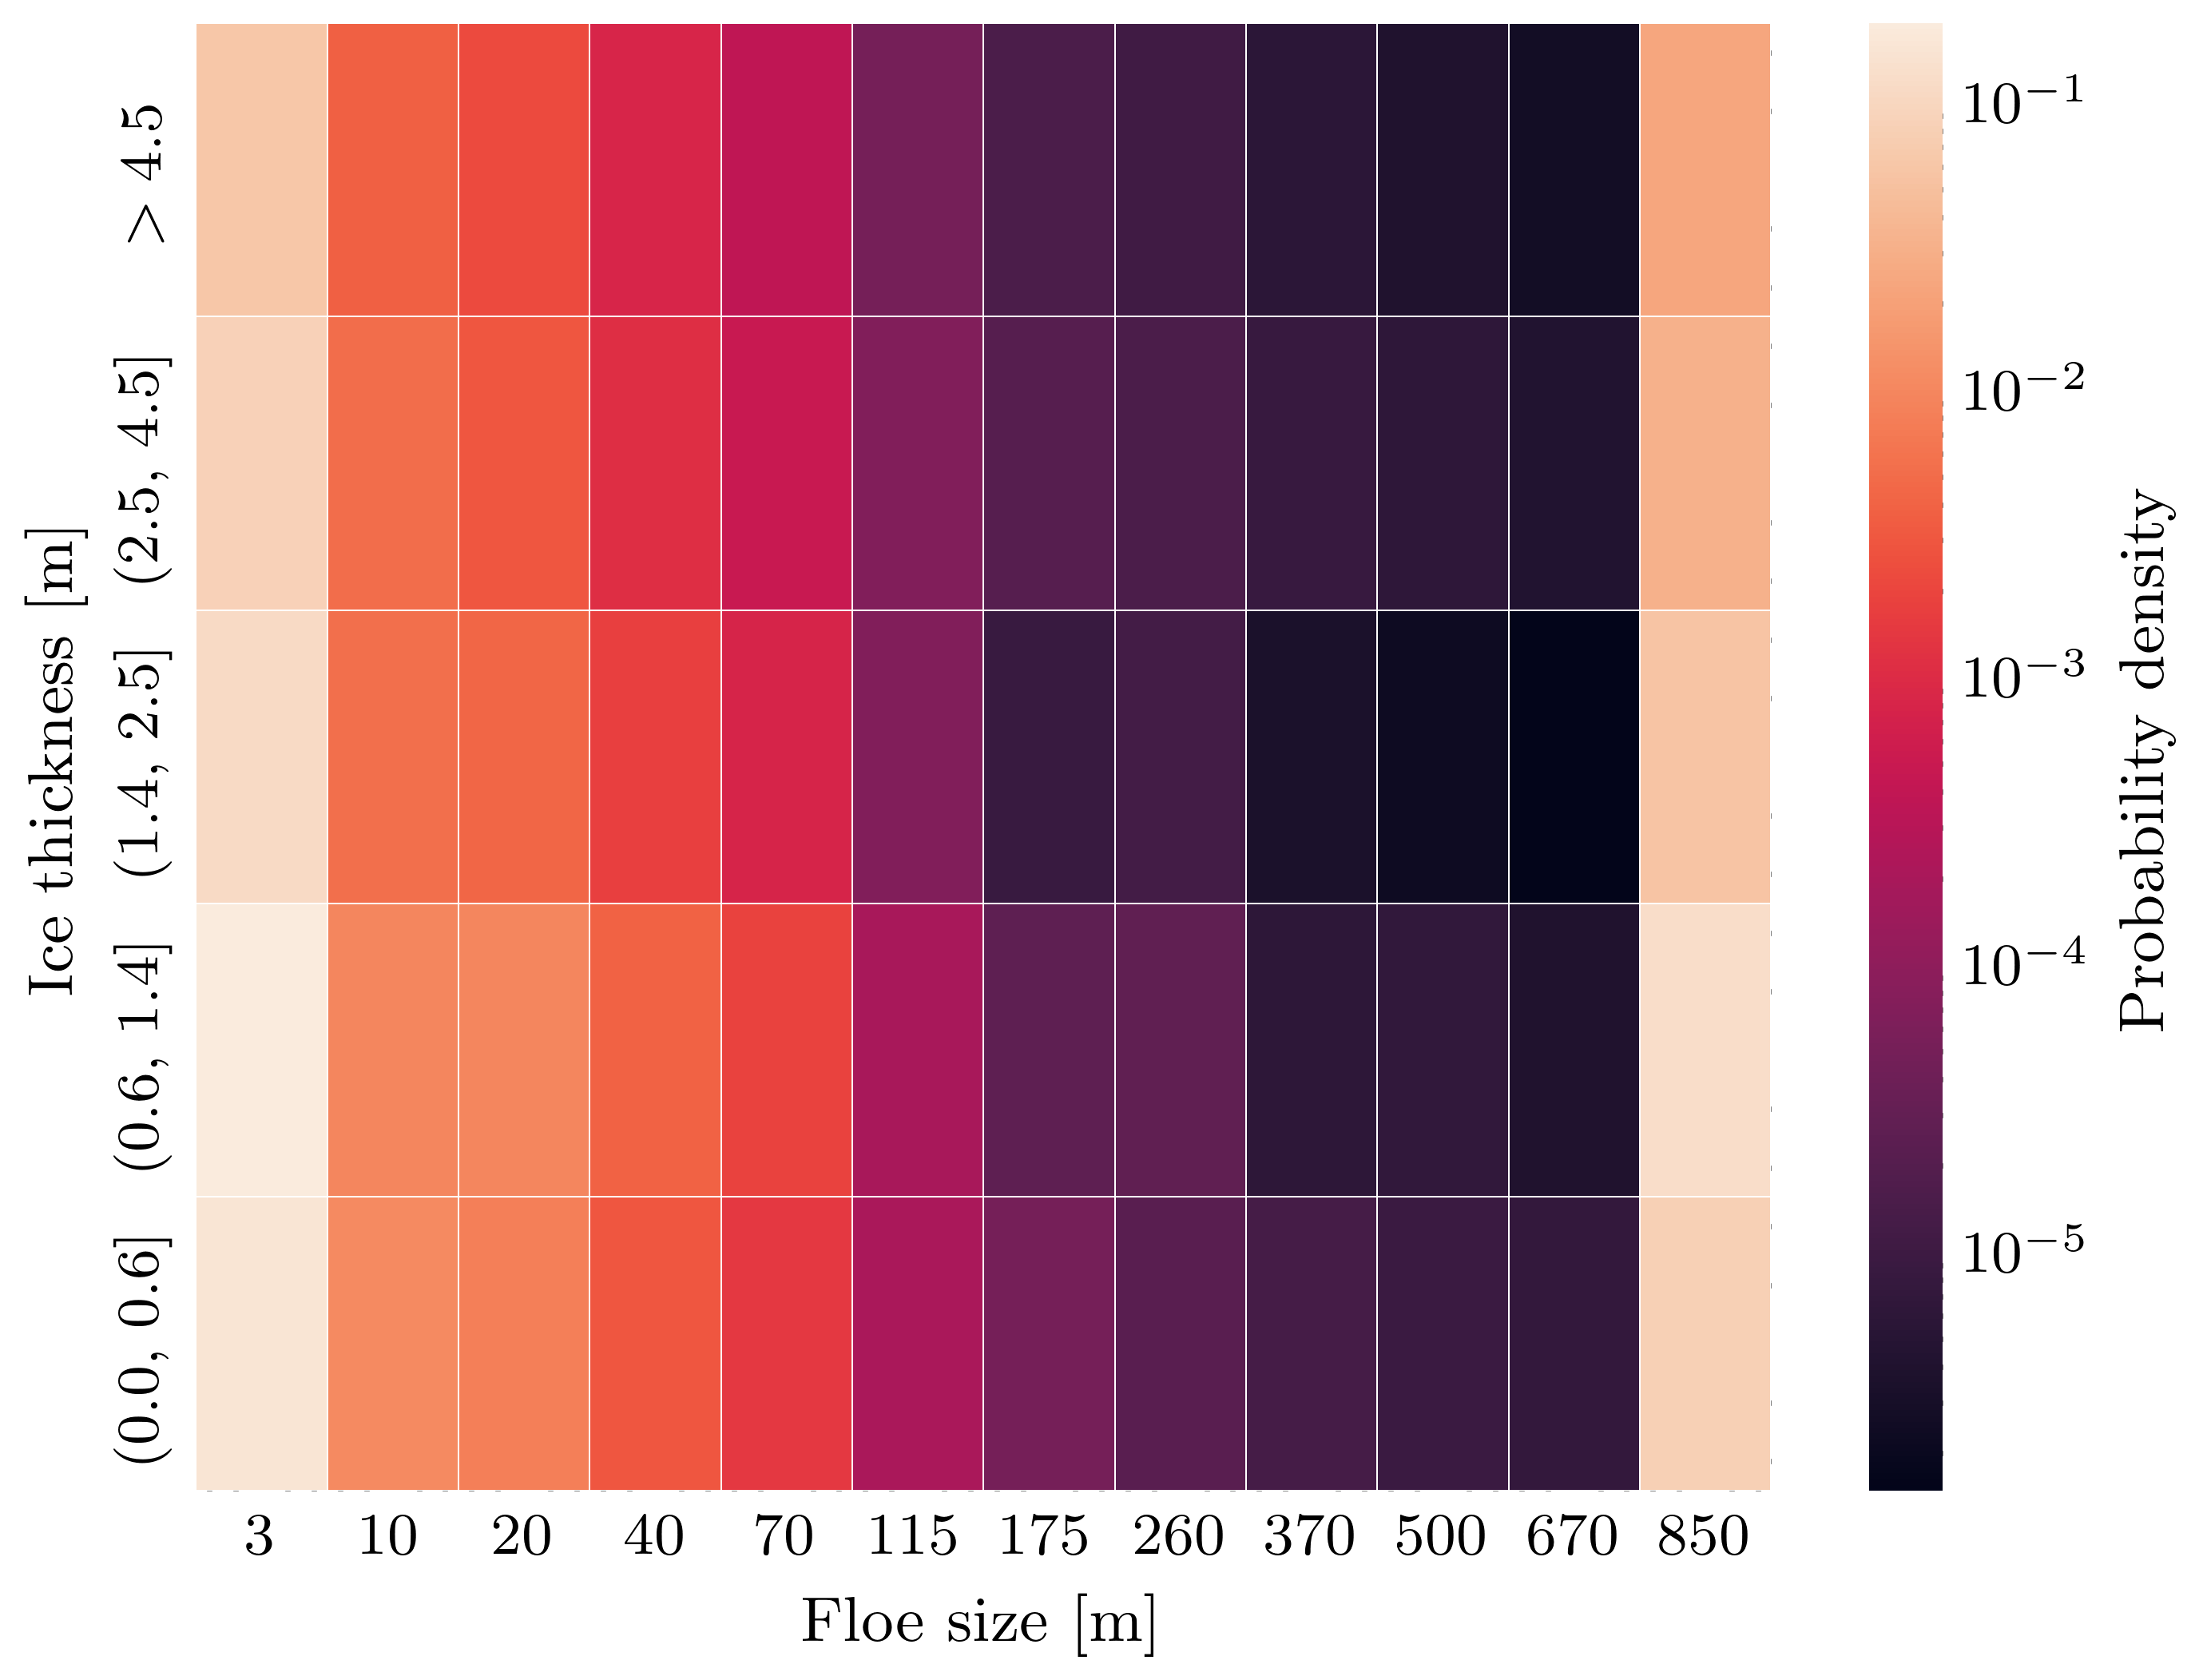

In [103]:
#fstd.
#fig, ax = plt.subplots()
from matplotlib.colors import LogNorm, Normalize
rc('text', usetex=True)
fig = plt.figure(figsize=[width*0.8, height*0.8])
ax = fig.add_subplot(1, 1, 1)
#xlabel = [1,
# ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
xlabel = ["3", "10", "20", "40", "70", "115", "175", "260", "370", "500", "670", "850"]
ylabel = ["(0.0, 0.6]", "(0.6, 1.4]", "(1.4, 2.5]", "(2.5, 4.5]", r'$>4.5$']
#plt.ylabel(r'$\alpha\leq\beta$', fontsize=20)
# ["1", "2", "3", "4", "5"]
#im, cbar = heatmap(fstd/fstd.sum(), [], [] , ax=ax,
#                   cmap="YlGn", cbarlabel="Probability density")
#im = ax.imshow(fstd/fstd.sum())
#ax.colorbar()
ax = sns.heatmap(fstd/fstd.sum(), linewidth=0.05, norm=LogNorm(),   cbar_kws={'label': 'Probability density'}, cmap="rocket")
ax.set_xticklabels(xlabel)
ax.set_yticklabels(ylabel)
ax.set_xlabel('Floe size [m]')
ax.set_ylabel('Ice thickness [m]')
ax.invert_yaxis()
plt.savefig('/home/566/nd0349/notebooks/heatmap.png', dpi = 1000, transparent=True)
plt.show()


TypeError: set_ticks() got an unexpected keyword argument 'labels'

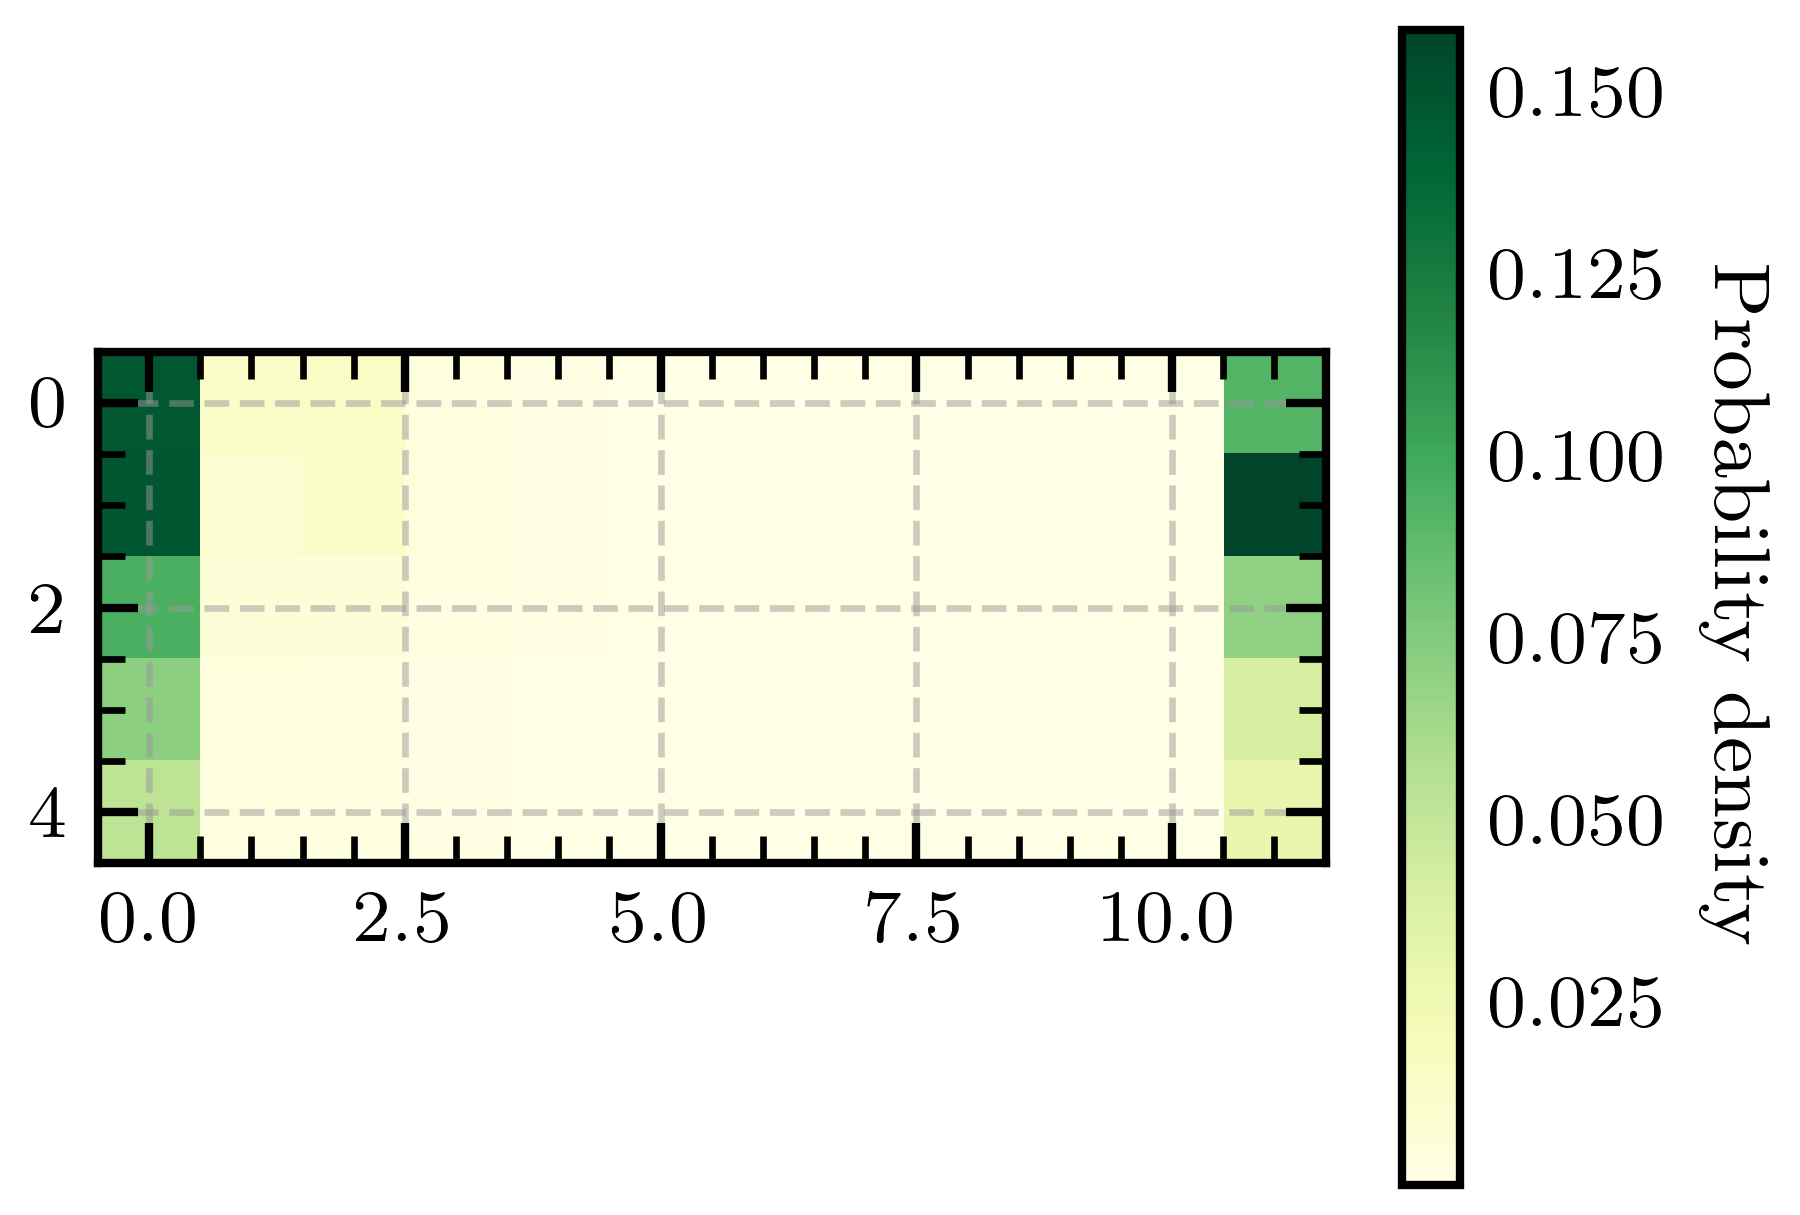

In [64]:
#fstd.
fig, ax = plt.subplots()
#xlabel = [1,
# ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"]
xlabel = ["3", "10", "20", "40", "70", "115", "175", "260", "370", "500", "670", "850"]
# ["1", "2", "3", "4", "5"]
im, cbar = heatmap(fstd/fstd.sum(), [], [] , ax=ax,
                   cmap="YlGn", cbarlabel="Probability density")
ax.colorbar()
ax.set_xlabel('Floe size [m]')
ax.set_ylabel('Ice thickness [m]')

In [69]:
ds.NCAT.values

array([6.4450723e-01, 1.3914335e+00, 2.4701793e+00, 4.5672879e+00,
       1.0000000e+08], dtype=float32)

In [ ]:
filenames= filenames[0:10]
joint_fsd = 
for i, f in tqdm(enumerate(filenames), total = len(filenames), desc='Getting afsdn'):
    if f.startswith("iceh."+str(year)):
        filename = mypath + '/' + f
        print(filename)
        ds = xr.open_dataset(file)
        aice = ds.aice
        lat = ds.TLAT
        dA = ds.HTE
        dA_south = dA.where(lat<0, drop=True)
        # First take only the southern hemisphere
        aice_south = (ds.aice.where(lat<0, drop=True)).squeeze() 
        # Then take all ice exceeding the ice edge
        aice_only= aice_south.where(aice_south>0.15, drop=True) 
    

In [ ]:
def calculate_sie(filenames, timestep='daily'):
    ds = xr.open_dataset(filenames[0])
    LN = ds.TLON.values
    LT = ds.TLAT.values
    lat_idx = LT[:,0] < 0
    # Initialise arrays
    n_lon,n_lat = LN.shape
    n_days = len(onlyfiles)
    print(n_days)
    SIA = np.empty((n_days))
    SIE = np.empty((n_days))
    
    # Open the file
    for idx, file in tqdm(enumerate(onlyfiles), total = len(onlyfiles)):
        #print(file)
        if timestep == 'daily':
            file_dates.append(np.datetime64(file[-13:-3]))
        elif timestep == 'monthly':
             file_dates.append(np.datetime64(file[-10:-3]))
        ds = xr.open_dataset(file)
        aice = ds.aice
        lat = ds.TLAT
        dA = ds.HTE
        dA_south = dA.where(lat<0, drop=True)
        # First take only the southern hemisphere
        aice_south = (ds.aice.where(lat<0, drop=True)).squeeze() 
        # Then take all ice exceeding the ice edge
        aice_only= aice_south.where(aice_south>0.15, drop=True) 
    
        tarea_south = (ds.tarea.where(lat<0, drop=True))
        tarea_aice_only = tarea_south.where(aice_south>0.15, drop=True)
        weights = tarea_south#np.multiply(hte_south, aice_south)
        weights.name = "Areal weights"
    
        aice_weighted = aice_south.weighted(weights)
        SIA[idx] = (aice_weighted.sum(("nj", "ni")).values)/(10**12)
        SIE[idx] = (tarea_aice_only.sum(("nj", "ni")).values)/(10**12)
    return (file_dates, SIE, SIA)

In [14]:
# Improving efficiency
# Parameters
mypath = '/g/data/ia40/cice-dirs/runs/waves-025-2019/history/'
year = 2019

# Start
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh_01h.' + str(year) + '-09-01-03600.nc'
#filename =  mypath + 'iceh.' + str(year) + '-09-01.nc'

onlyfiles = glob.glob("{path}/iceh_01h.*{year}*".format(path=mypath, year=year))
#onlyfiles = glob.glob("{path}/iceh.*{year}*".format(path=mypath, year=year))
onlyfiles.sort()

ds = xr.open_dataset(filename)
LN = ds.TLON.values
LT = ds.TLAT.values
lat_idx = LT[:,0] < 0

# Initialise arrays
n_lat,n_lon = LN.shape
n_days = len(onlyfiles)
print(n_days)
effective_wave_penetration_array = np.empty((n_days,n_lon))
wave_penetration_array = np.empty((n_days,n_lon))
incident_swh_array = np.empty((n_days,n_lon))
#std_swh = np.nanstd(wave_sig_ht)

# Loop over every file
day_vec = range(n_days)#range(244-1,244+29,1)



2019
720


In [44]:
#for day_idx in tqdm(day_vec):
#    filename = onlyfiles[day_idx]
#    ds = xr.open_dataset(filename)
#    aice = ds.aice.values
#    wave_sig_ht = ds.wave_sig_ht.values
day_idx = 0
filename = onlyfiles[day_idx]
ds = xr.open_dataset(filename)
#aice = ds.aice.values
#wave_sig_ht = ds.wave_sig_ht.values
aice_south = (ds.aice.where(ds.TLAT<0, drop=True)).squeeze() 
swh_south = (ds.wave_sig_ht.where(ds.TLAT<0, drop=True)).squeeze() 
swh_sia = (ds.wave_sig_ht.where(ds.aice>0.15, drop=True)).squeeze() 
swh_5cm = (ds.wave_sig_ht.where(ds.wave_sig_ht>0.05, drop=True)).squeeze() 

hte_south = (ds.HTE.where(ds.TLAT<0, drop=True)).squeeze() 
hte_sia = (ds.HTE.where(ds.aice[0,:,:]>0.15, drop=True)).squeeze() 
hte_5cm = (ds.HTE.where(ds.wave_sig_ht[0,:,:]>0.05, drop=True)).squeeze() 


weights = hte_5cm #np.multiply(hte_south, aice_south)
weights.name = "Cell width weights"

swh_5cm_weighted = swh_5cm.weighted(weights)
swh_5cm_weighted.sum(dim="ni")
swh_5cm_weighted.shape


ValueError: `weights` cannot contain missing values. Missing values can be replaced by `weights.fillna(0)`.

In [ ]:
hte_south = (ds.HTE.where(ds.TLAT<0, drop=True)).squeeze() 
hte_sia = (ds.HTE.where(ds.aice>0.15, drop=True)).squeeze() 


In [ ]:
weights = hte_wave_area #np.multiply(hte_south, aice_south)
weights.name = "Cell width weights"

swh_5cm_weighted = swh_5cm.weighted(weights)
swh_5cm_weighted.sum(dim="ni")
swh_5cm_weighted.shape

In [32]:
ds.TLAT[:,0]

<xarray.DataArray 'TLAT' (nj: 1080)>
array([-81.07702, -80.97142, -80.86582, ...,  65.0259 ,  65.02591,  65.02591],
      dtype=float32)
Coordinates:
    TLON     (nj) float32 ...
    TLAT     (nj) float32 -81.08 -80.97 -80.87 -80.76 ... 65.03 65.03 65.03
    ULON     (nj) float32 ...
    ULAT     (nj) float32 ...
Dimensions without coordinates: nj
Attributes:
    long_name:  T grid center latitude
    units:      degrees_north

In [ ]:
# Circumpolar for each day
for day_idx in tqdm(day_vec, total=len(day_vec), desc = 'Calculating wave penetration...'):

    filename = onlyfiles[day_idx]
    ds = xr.open_dataset(filename)
    aice = ds.aice.values
    wave_sig_ht = ds.wave_sig_ht.values
    
    for lon_idx in range(0,n_lon):
        # MIZ width
        ice_idx = (ds['aice'][0,:,lon_idx].values > 0.15)
        swh_idx_tmp = ds['wave_sig_ht'][0,:,lon_idx].values > 0.05# std_swh
        swh_idx = swh_idx_tmp*ice_idx*lat_idx
        if swh_idx.any():
            effective_wave_penetration_array[day_idx,lon_idx] = np.multiply(ds['HTE'][swh_idx,lon_idx].data, ds['aice'][0,swh_idx,lon_idx].data).sum()
            wave_penetration_array[day_idx,lon_idx] = ds['HTE'][swh_idx,lon_idx].data.sum()
#            (ds['HTE'][swh_idx,lon_idx]*ds['aice'][0,swh_idx,lon_idx]).data.sum()
        else:
            #print('no waves')
            effective_wave_penetration_array[day_idx,lon_idx] =  0.0 #np.nan
            wave_penetration_array[day_idx,lon_idx] =  0.0 #np.nan
            
          
        if ice_idx.any():
            locs = np.asarray(ice_idx==True).nonzero()
            temp_locs = locs[0]
            incident_swh_array[day_idx,lon_idx] = wave_sig_ht[0,temp_locs[-1],lon_idx]
            #np.nanmax(wave_sig_ht[0,:,lon_idx]) #wave_sig_ht[0,temp_locs[-1],lon_idx]
        else:
            incident_swh_array[day_idx,lon_idx] = 0.0 #np.nan
            
print('Done!')

# Debugging JRA forcing data

In [8]:
import xarray as xr
filename = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-025/JRA55-do/1-5-0/8XDAILY/JRA55_03hr_forcing_2019.nc'
ds = xr.open_dataset(filename)
LAT = ds.LAT.values
LON = ds.LON.values
plot_data = ds['airtmp'][0,:,:]
ds

filename = '/g/data/ia40/cice-dirs/runs/waves-025/history/iceh.2010-01-01.nc'
ds_mask = xr.open_dataset(filename)
LT = ds_mask['TLAT']
LN = ds_mask['TLON']
land_mask = ds_mask['tmask'].where(ds_mask['tmask'][:,:] != 1.) 

del ds_mask
del ds

In [9]:
filename_cice = '/g/data/ia40/cice-dirs/runs/waves-025/history/iceh.2010-01-01.nc'
ds_mask = xr.open_dataset(filename_cice)
LAT = ds_mask['TLAT'].where(ds_mask.TLAT<-50, drop=True)
LON = ds_mask['TLON'].where(ds_mask.TLAT<-50, drop=True)
land_mask = ds_mask['tmask'].where(ds_mask['tmask'][:,:] != 1.) .where(ds_mask.TLAT<-50, drop=True)


filename = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-025/JRA55-do/1-5-0/8XDAILY/JRA55_03hr_forcing_2019.nc'
ds = xr.open_dataset(filename)
#LAT = ds.LAT.where(ds.LAT<-80, drop=True)
#LON = ds.LON.where(ds.LAT<-80, drop=True)
timestep = 0
plot_data = ds['airtmp'][timestep,:,:].where(ds_mask.TLAT<-50, drop=True)
land_mask = np.isnan(plot_data)
#ds.LAT[10,:]

del ds, ds_mask

In [ ]:
timestep = 0
filename = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-025/JRA55-do/1-5-0/8XDAILY/JRA55_03hr_forcing_2019.nc'
ds = xr.open_dataset(filename)
for timestep in tqdm(range(2920)):
    plot_data = ds['airtmp'][timestep,:,:]
    if plot_data.values.min() < 200 :
        print(timestep)
    #print('Max:', plot_data.values.max())
    #print('Min:', plot_data.values.min())

 12%|█▏        | 342/2920 [00:13<01:40, 25.70it/s]


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x151cd8803e50> (for post_execute):



KeyboardInterrupt



In [28]:
ds

<xarray.Dataset>
Dimensions:  (time: 2920, nj: 1080, ni: 1440)
Coordinates:
    LON      (nj, ni) float64 ...
    LAT      (nj, ni) float64 ...
  * time     (time) datetime64[ns] 2019-01-01T01:30:00 ... 2019-12-31T22:30:00
Dimensions without coordinates: nj, ni
Data variables:
    airtmp   (time, nj, ni) float32 ...
    dlwsfc   (time, nj, ni) float32 ...
    glbrad   (time, nj, ni) float32 ...
    spchmd   (time, nj, ni) float32 ...
    ttlpcp   (time, nj, ni) float32 ...
    wndewd   (time, nj, ni) float32 ...
    wndnwd   (time, nj, ni) float32 ...
Attributes:
    creation_date:  2023-05-13 17
    conventions:    CCSM data model domain description -- for CICE6 standalon...
    title:          re-gridded JRA55 for CICE6 standalone atmospheric forcing
    source:         JRA55-do 1.4.0, https://doi.org/10.1016/j.ocemod.2018.07....
    comment:        source files found on gadi, /g/data/qv56/inputs
    author:         Noah Day
    email:          noah.day@adelaide.edu.au

In [10]:
plot_dir = '/home/566/nd0349/notebooks/figures'

COLOR = 'black'

filename = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-025/JRA55-do/1-5-0/8XDAILY/JRA55_03hr_forcing_2019.nc'
ds = xr.open_dataset(filename)
filename_cice = '/g/data/ia40/cice-dirs/runs/waves-025/history/iceh.2010-01-01.nc'
ds_mask = xr.open_dataset(filename_cice)

timestep = 0
for timestep in tqdm(range(44,47)):
    
    plot_data = ds['airtmp'][timestep,:,:].where(ds_mask.TLAT<-50, drop=True)

    fig = plt.figure(figsize=[5, 5])
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
    ax = create_map_axis(ax=ax, LN=LON, LT=LAT,land_mask=land_mask, draw_labels="all")
    
    
    var = 'airtmp'
    cs = ax.pcolormesh(LON, LAT, plot_data -273.15,
                        transform=ccrs.PlateCarree(), shading = 'auto',
                       #vmin = -15, vmax = 15,
                       cmap = cmo.balance,
                        #cmap=cmo.ice, vmin = 0, vmax = 1, #norm = colors.LogNorm(vmin=0, vmax=1)
                       #cmap=cmap, norm=norm
                       )
    print(plot_data.values.max())
    print(plot_data.values.min())
    # COLORBAR
    pos1 = ax.get_position()
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([pos1.x0 + pos1.width + 0.05, pos1.y0, pos1.height/20, pos1.height])
    cb = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
    cb.set_label('Air temperature [C]', color=COLOR) # set colorbar label plus label color
    #cb.ax.yaxis.set_tick_params(color=COLOR) # set colorbar tick color
    #cb.outline.set_edgecolor(COLOR) # set colorbar edgecolor 
    #plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=COLOR) # set colorbar ticklabels
    
    #temp = filename.partition('.')[2]
    #fig.suptitle(temp.partition('.')[0], fontsize=15, x=0.5, y = 1.01)
    plt.savefig(plot_dir + '/' + var + '-' + str(timestep) +'.png', dpi = 450, transparent=True)
    plt.close(fig)
    #plt.show()

  0%|          | 0/3 [00:00<?, ?it/s]

285.66537
259.34753


 33%|███▎      | 1/3 [00:01<00:03,  1.75s/it]

286.3928
259.35376


 67%|██████▋   | 2/3 [00:03<00:01,  1.57s/it]

288.24075
259.35992


100%|██████████| 3/3 [00:04<00:00,  1.56s/it]


# k-means testing

In [4]:
filename = '/g/data/ia40/sea-ice-classification/kmean_2010.nc'
ds_ocn_cont = xr.open_dataset(filename)
LAT = ds_ocn_cont['LAT'].where(ds_ocn_cont.LAT<-50, drop=True)
LON = ds_ocn_cont['LON'].where(ds_ocn_cont.LAT<-50, drop=True)
land_mask = ds_ocn_cont['tmask'].where(ds_ocn_cont['tmask'][:,:] != 1.) .where(ds_ocn_cont.LAT<-50, drop=True)

filename = '/g/data/ia40/sea-ice-classification/v1.0_discont_ocn/kmean_2010.nc'
ds_original = xr.open_dataset(filename)


nan
nan


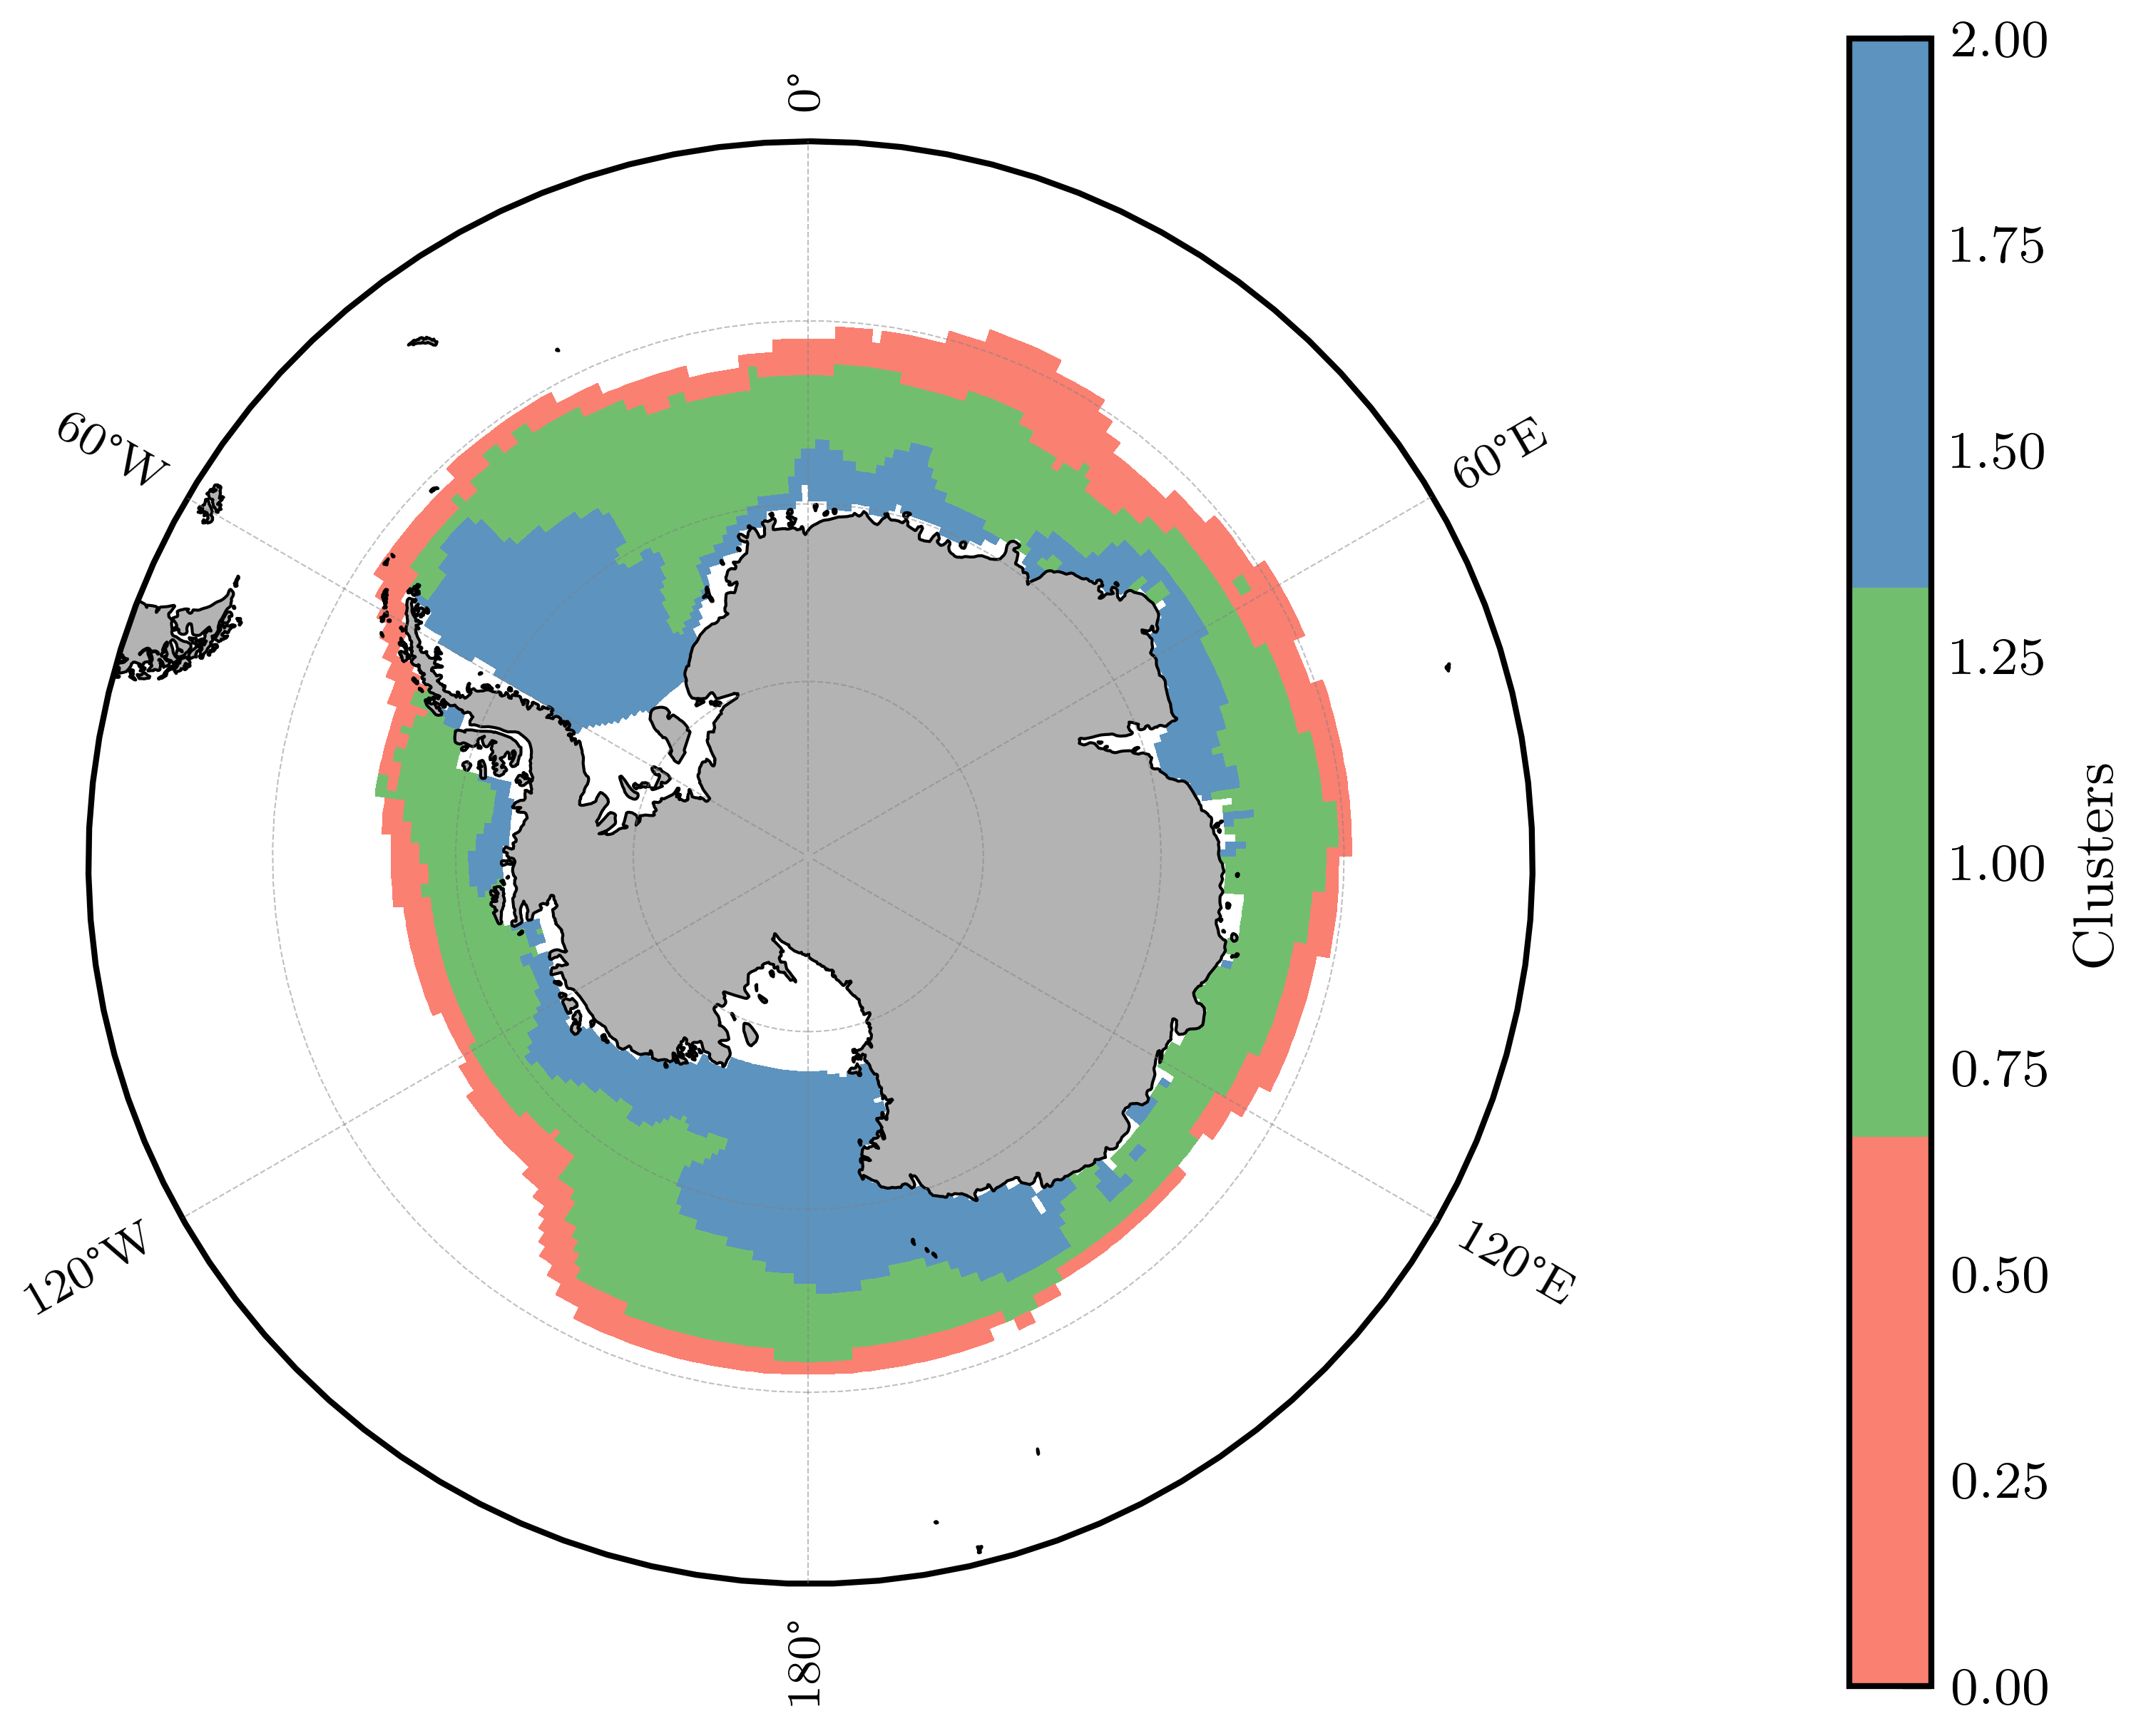

In [9]:
COLOR = 'black'
timestep = 150
plot_data = ds_ocn_cont['k'][timestep,:,:].where(ds_ocn_cont.LAT<-50, drop=True)

fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax = create_map_axis(ax=ax, LN=LON, LT=LAT,land_mask=land_mask, draw_labels="all")
cmap = mpl.colors.ListedColormap([(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])#,'cyan','magenta'])


var = 'airtmp'
cs = ax.pcolormesh(LON, LAT, plot_data,
                    transform=ccrs.PlateCarree(), shading = 'auto',
                   #vmin = -15, vmax = 15,
                   cmap = cmap,
                    #cmap=cmo.ice, vmin = 0, vmax = 1, #norm = colors.LogNorm(vmin=0, vmax=1)
                   #cmap=cmap, norm=norm
                   )
print(plot_data.values.max())
print(plot_data.values.min())
# COLORBAR
pos1 = ax.get_position()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([pos1.x0 + pos1.width + 0.05, pos1.y0, pos1.height/20, pos1.height])
cb = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cb.set_label('Clusters', color=COLOR)
plt.savefig('/home/566/nd0349/notebooks/ocn_cont_day150.png', dpi = 1000)

nan
nan


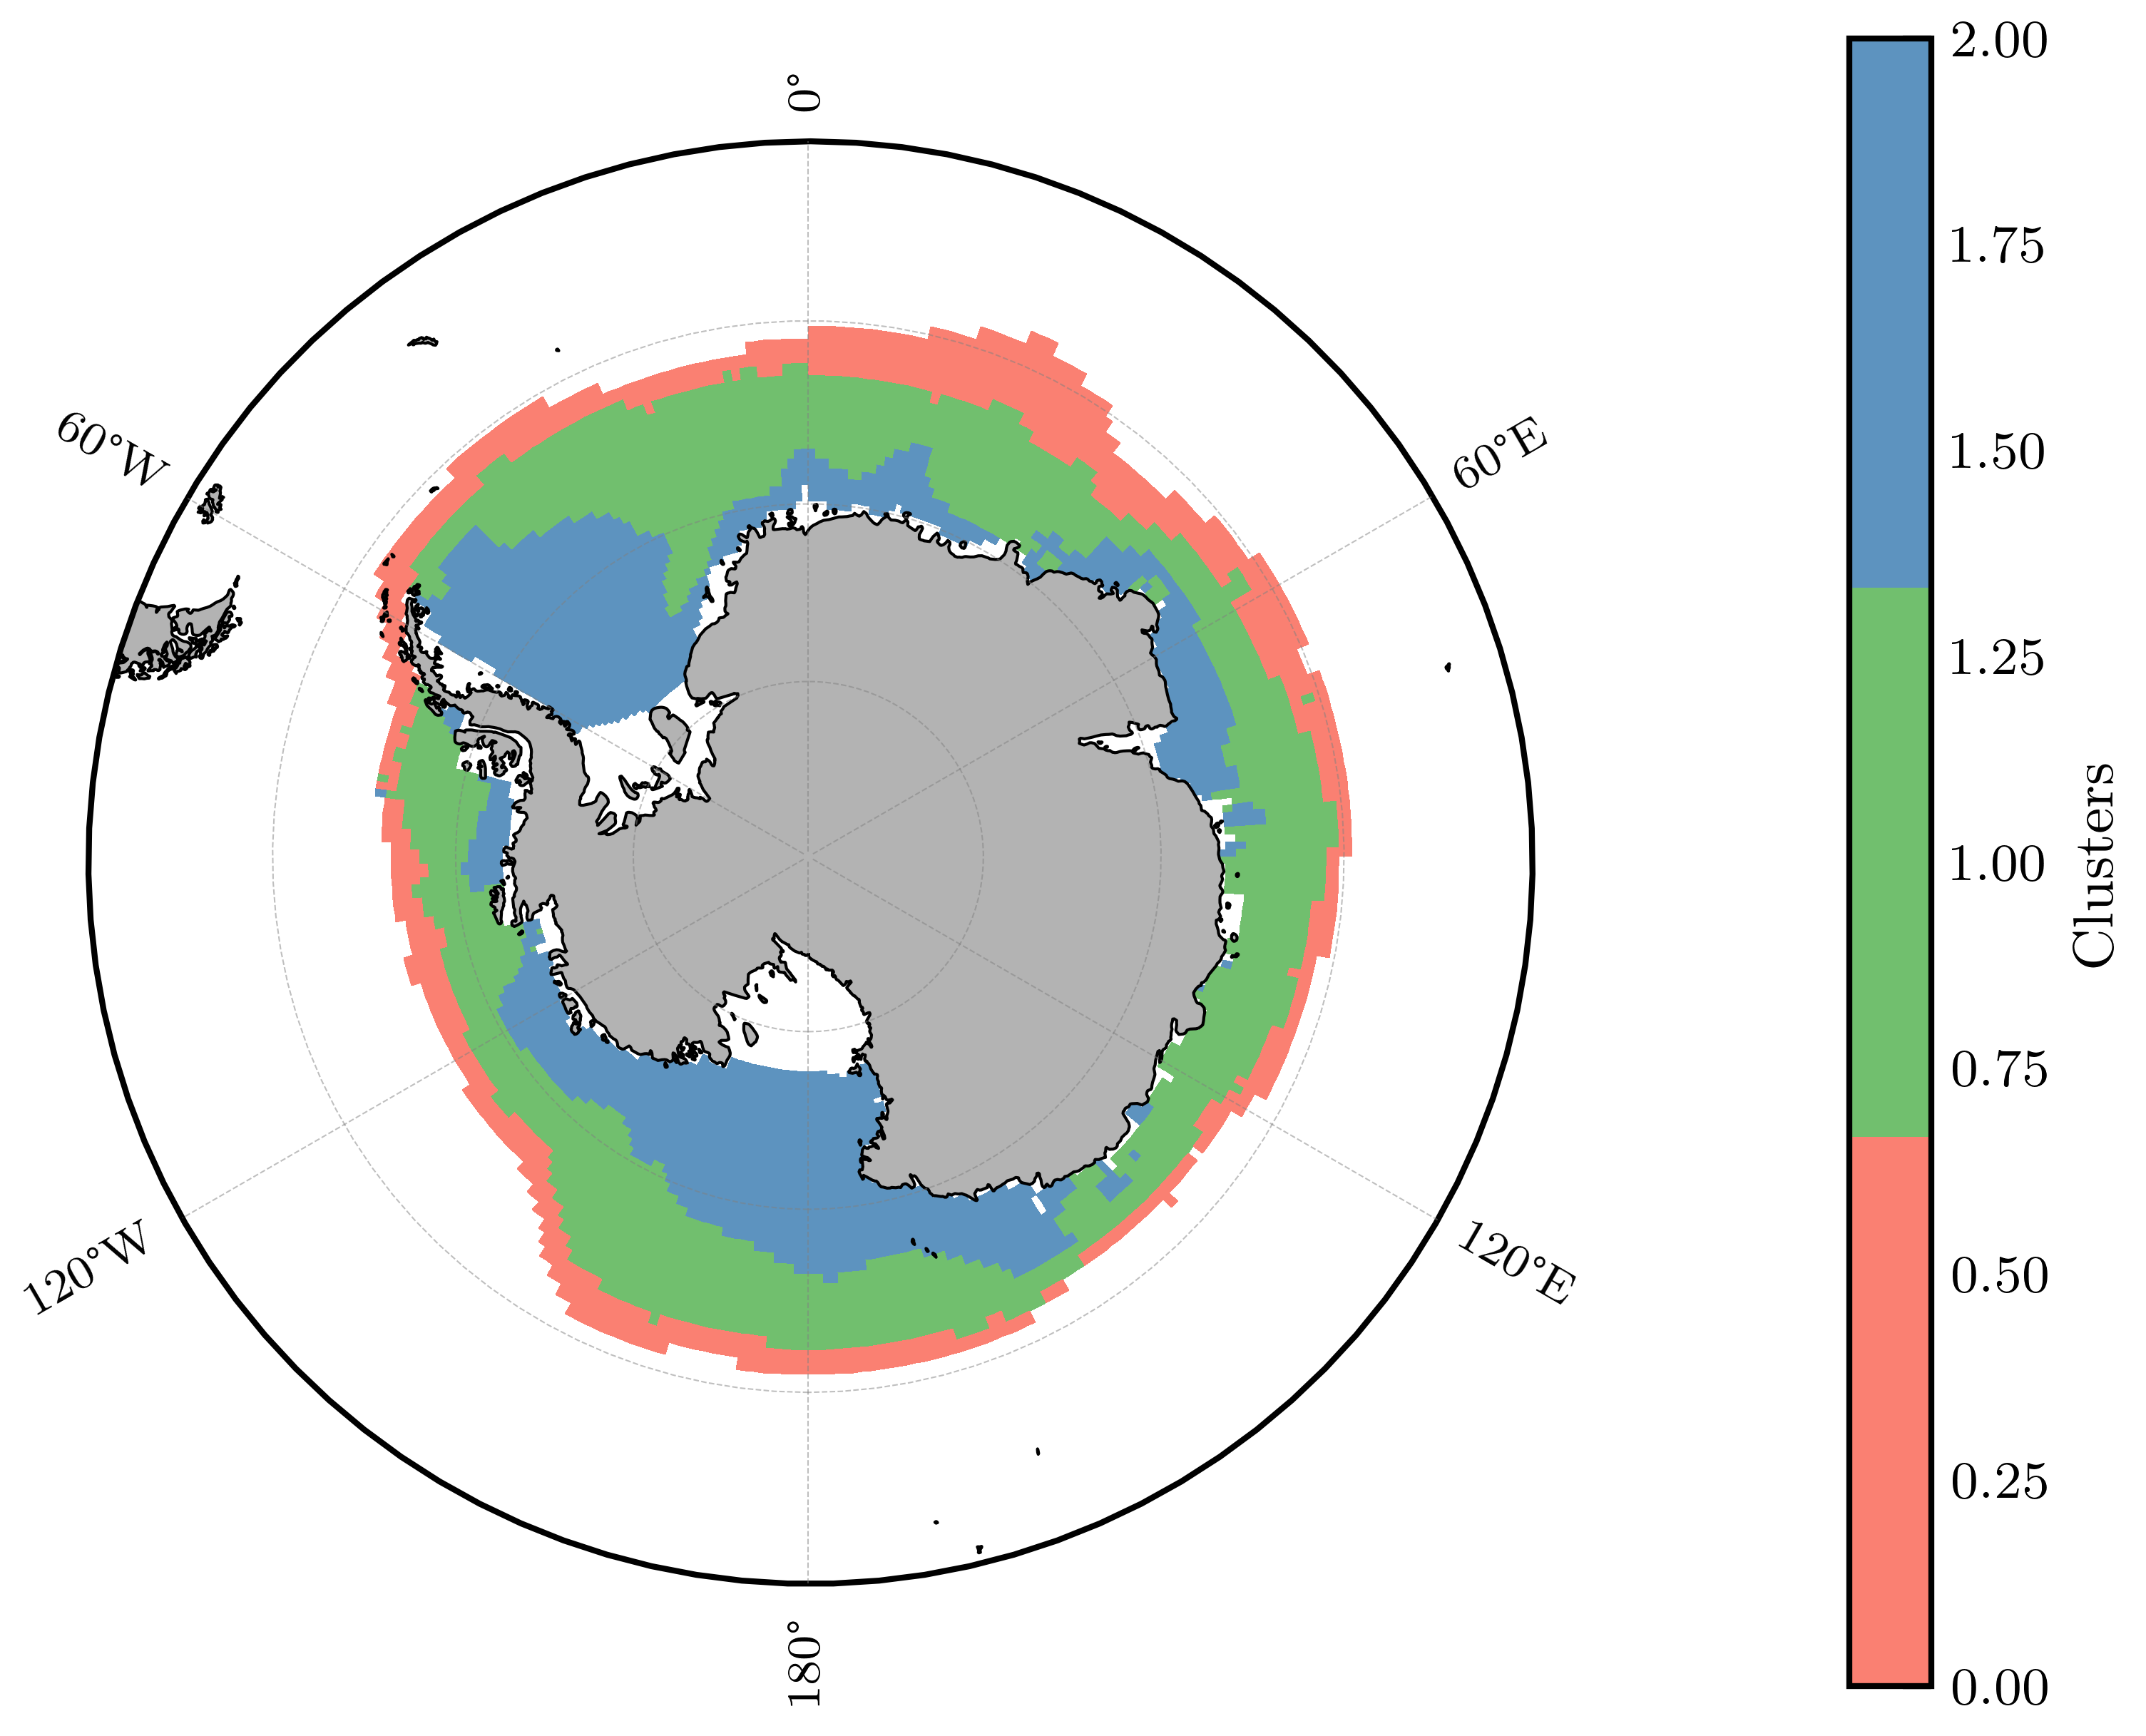

In [10]:
COLOR = 'black'
timestep = 150
plot_data = ds_original['k'][timestep,:,:].where(ds_ocn_cont.LAT<-50, drop=True)

fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax = create_map_axis(ax=ax, LN=LON, LT=LAT,land_mask=land_mask, draw_labels="all")


var = 'airtmp'
cs = ax.pcolormesh(LON, LAT, plot_data,
                    transform=ccrs.PlateCarree(), shading = 'auto',
                   #vmin = -15, vmax = 15,
                   cmap = cmap,
                    #cmap=cmo.ice, vmin = 0, vmax = 1, #norm = colors.LogNorm(vmin=0, vmax=1)
                   #cmap=cmap, norm=norm
                   )
print(plot_data.values.max())
print(plot_data.values.min())
# COLORBAR
pos1 = ax.get_position()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([pos1.x0 + pos1.width + 0.05, pos1.y0, pos1.height/20, pos1.height])
cb = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')

cb.set_label('Clusters', color=COLOR)
plt.savefig('/home/566/nd0349/notebooks/original_day150.png', dpi = 1000)

nan
nan


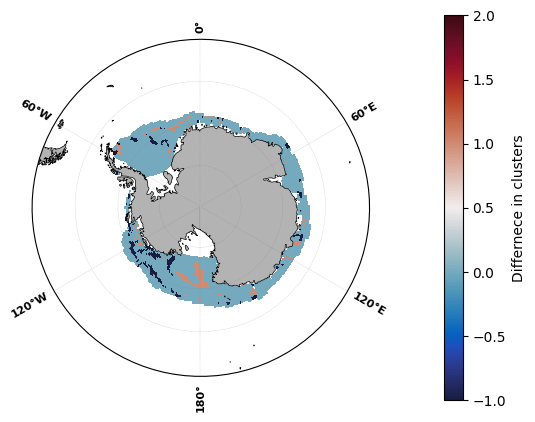

In [15]:
COLOR = 'black'
timestep = 100
plot_data = ds_ocn_cont['k'][timestep,:,:].where(ds_ocn_cont.LAT<-50, drop=True) - ds_original['k'][timestep,:,:].where(ds_ocn_cont.LAT<-50, drop=True)

fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax = create_map_axis(ax=ax, LN=LON, LT=LAT,land_mask=land_mask, draw_labels="all")


var = 'airtmp'
cs = ax.pcolormesh(LON, LAT, plot_data,
                    transform=ccrs.PlateCarree(), shading = 'auto',
                   #vmin = -15, vmax = 15,
                   cmap = cmo.balance,
                    #cmap=cmo.ice, vmin = 0, vmax = 1, #norm = colors.LogNorm(vmin=0, vmax=1)
                   #cmap=cmap, norm=norm
                   )
print(plot_data.values.max())
print(plot_data.values.min())
# COLORBAR
pos1 = ax.get_position()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([pos1.x0 + pos1.width + 0.05, pos1.y0, pos1.height/20, pos1.height])
cb = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cb.set_label('Differnece in clusters', color=COLOR)

In [2]:
# Initialise arrays
n_days = 365
year_range = range(2010,2011)
SIE_MIZ = np.empty((len(year_range), n_days))
SIE_YOUNG = np.empty((len(year_range), n_days))
SIE_OLD = np.empty((len(year_range), n_days))
SIE_total = np.empty((len(year_range), n_days))

day_vec = range(0,n_days,1)

# Circumpolar for each day
for i,year in tqdm(enumerate(year_range), total = len(year_range), desc = "Reading in SIE data"):
    filename = '/g/data/ia40/sea-ice-classification/kmean_'+str(year)+'.nc'
    ds = xr.open_dataset(filename)
    for day_idx in day_vec:
        # Calculate MIZ area
        SIE_MIZ[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 0).sum()
        SIE_YOUNG[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 1).sum()
        SIE_OLD[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 2).sum()
        #SIE_total[i,day_idx] = np.multiply(ds['tarea'][:,:].data, ds['aice'][day_idx,:,:].data > 0.15).sum()*(1/len(year_range))
del ds

df_miz_ts = pd.DataFrame({"date": pd.date_range(start="2010-01-01",end="2010-12-31"),
                          "1": SIE_MIZ.mean(axis=0)*(0.000000000001),
                          "2": SIE_YOUNG.mean(axis=0)*(0.000000000001),
                          "3": SIE_OLD.mean(axis=0)*(0.000000000001)})

Reading in SIE data: 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


In [3]:
# Initialise arrays
n_days = 365
year_range = range(2010,2011)
SIE_MIZ = np.empty((len(year_range), n_days))
SIE_YOUNG = np.empty((len(year_range), n_days))
SIE_OLD = np.empty((len(year_range), n_days))
SIE_total = np.empty((len(year_range), n_days))

day_vec = range(0,n_days,1)

# Circumpolar for each day
for i,year in tqdm(enumerate(year_range), total = len(year_range), desc = "Reading in SIE data"):
    filename = '/g/data/ia40/sea-ice-classification/v1.0_discont_ocn/kmean_'+str(year)+'.nc'
    ds = xr.open_dataset(filename)
    for day_idx in day_vec:
        # Calculate MIZ area
        SIE_MIZ[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 0).sum()
        SIE_YOUNG[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 1).sum()
        SIE_OLD[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 2).sum()
        #SIE_total[i,day_idx] = np.multiply(ds['tarea'][:,:].data, ds['aice'][day_idx,:,:].data > 0.15).sum()*(1/len(year_range))
del ds

df_miz_ts_orig = pd.DataFrame({"date": pd.date_range(start="2010-01-01",end="2010-12-31"),
                          "1": SIE_MIZ.mean(axis=0)*(0.000000000001),
                          "2": SIE_YOUNG.mean(axis=0)*(0.000000000001),
                          "3": SIE_OLD.mean(axis=0)*(0.000000000001)})

Reading in SIE data: 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]


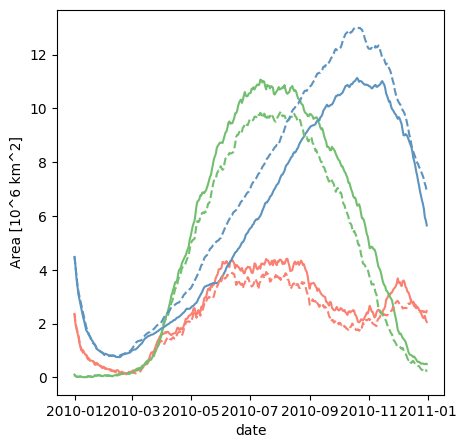

In [4]:
rc('text', usetex=False)
fig = plt.figure(figsize=[5, 5])
ax5 = fig.add_subplot(1, 1, 1)

sns.lineplot(ax=ax5, x=df_miz_ts['date'], y=df_miz_ts['1'], color = (0.9805, 0.5000, 0.4453, 1.0),errorbar=None)
sns.lineplot(ax=ax5, x=df_miz_ts['date'], y=df_miz_ts['2'], color = (0.4416, 0.7490, 0.4322, 1.0),errorbar=None)
sns.lineplot(ax=ax5, x=df_miz_ts['date'], y=df_miz_ts['3'], color = (0.3639, 0.5755, 0.748, 1.0),errorbar=None)
sns.lineplot(ax=ax5, x=df_miz_ts_orig['date'], y=df_miz_ts_orig['1'], color = (0.9805, 0.5000, 0.4453, 1.0),errorbar=None, linestyle = '--')
sns.lineplot(ax=ax5, x=df_miz_ts_orig['date'], y=df_miz_ts_orig['2'], color = (0.4416, 0.7490, 0.4322, 1.0),errorbar=None, linestyle = '--')
sns.lineplot(ax=ax5, x=df_miz_ts_orig['date'], y=df_miz_ts_orig['3'], color = (0.3639, 0.5755, 0.748, 1.0),errorbar=None, linestyle = '--')
ax5.set_ylabel('Area [10^6 km^2]')
plt.savefig('/home/566/nd0349/notebooks/kmean_ts_original_2010.png', dpi = 1000)
plt.show()

In [3]:
# Initialise arrays
n_days = 365
year_range = range(2013,2014)
SIE_MIZ_cont = np.empty((len(year_range), n_days))
SIE_YOUNG_cont = np.empty((len(year_range), n_days))
SIE_OLD_cont = np.empty((len(year_range), n_days))
SIE_total = np.empty((len(year_range), n_days))

day_vec = range(0,n_days,1)

# Circumpolar for each day
for i,year in tqdm(enumerate(year_range), total = len(year_range), desc = "Reading in SIE data"):
    filename = '/g/data/ia40/sea-ice-classification/kmean_2013_cont_ocn.nc'
    ds = xr.open_dataset(filename)
    for day_idx in day_vec:
        # Calculate MIZ area
        SIE_MIZ_cont[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 0).sum()
        SIE_YOUNG_cont[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 1).sum()
        SIE_OLD_cont[i, day_idx] = np.multiply(ds['tarea'][:,:].data, ds['k'][day_idx,:,:].data == 2).sum()
        #SIE_total[i,day_idx] = np.multiply(ds['tarea'][:,:].data, ds['aice'][day_idx,:,:].data > 0.15).sum()*(1/len(year_range))
del ds

df_miz_ts_cont = pd.DataFrame({"date": pd.date_range(start="2013-01-01",end="2013-12-31"),
                          "1": SIE_MIZ_cont.mean(axis=0)*(0.000000000001),
                          "2": SIE_YOUNG_cont.mean(axis=0)*(0.000000000001),
                          "3": SIE_OLD_cont.mean(axis=0)*(0.000000000001)})

Reading in SIE data: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


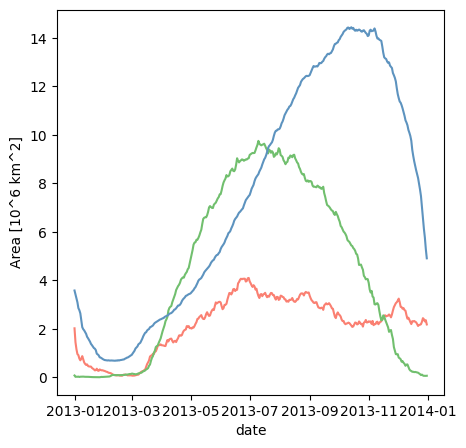

In [4]:
fig = plt.figure(figsize=[5, 5])
ax5 = fig.add_subplot(1, 1, 1)

sns.lineplot(ax=ax5, x=df_miz_ts_cont['date'], y=df_miz_ts_cont['1'], color = (0.9805, 0.5000, 0.4453, 1.0),errorbar=None)
sns.lineplot(ax=ax5, x=df_miz_ts_cont['date'], y=df_miz_ts_cont['2'], color = (0.4416, 0.7490, 0.4322, 1.0),errorbar=None)
sns.lineplot(ax=ax5, x=df_miz_ts_cont['date'], y=df_miz_ts_cont['3'], color = (0.3639, 0.5755, 0.748, 1.0),errorbar=None)
ax5.set_ylabel('Area [10^6 km^2]')
plt.savefig('/home/566/nd0349/notebooks/ocn_cont2013.png', dpi = 1000)
plt.show()

ax1 done
ax2 done


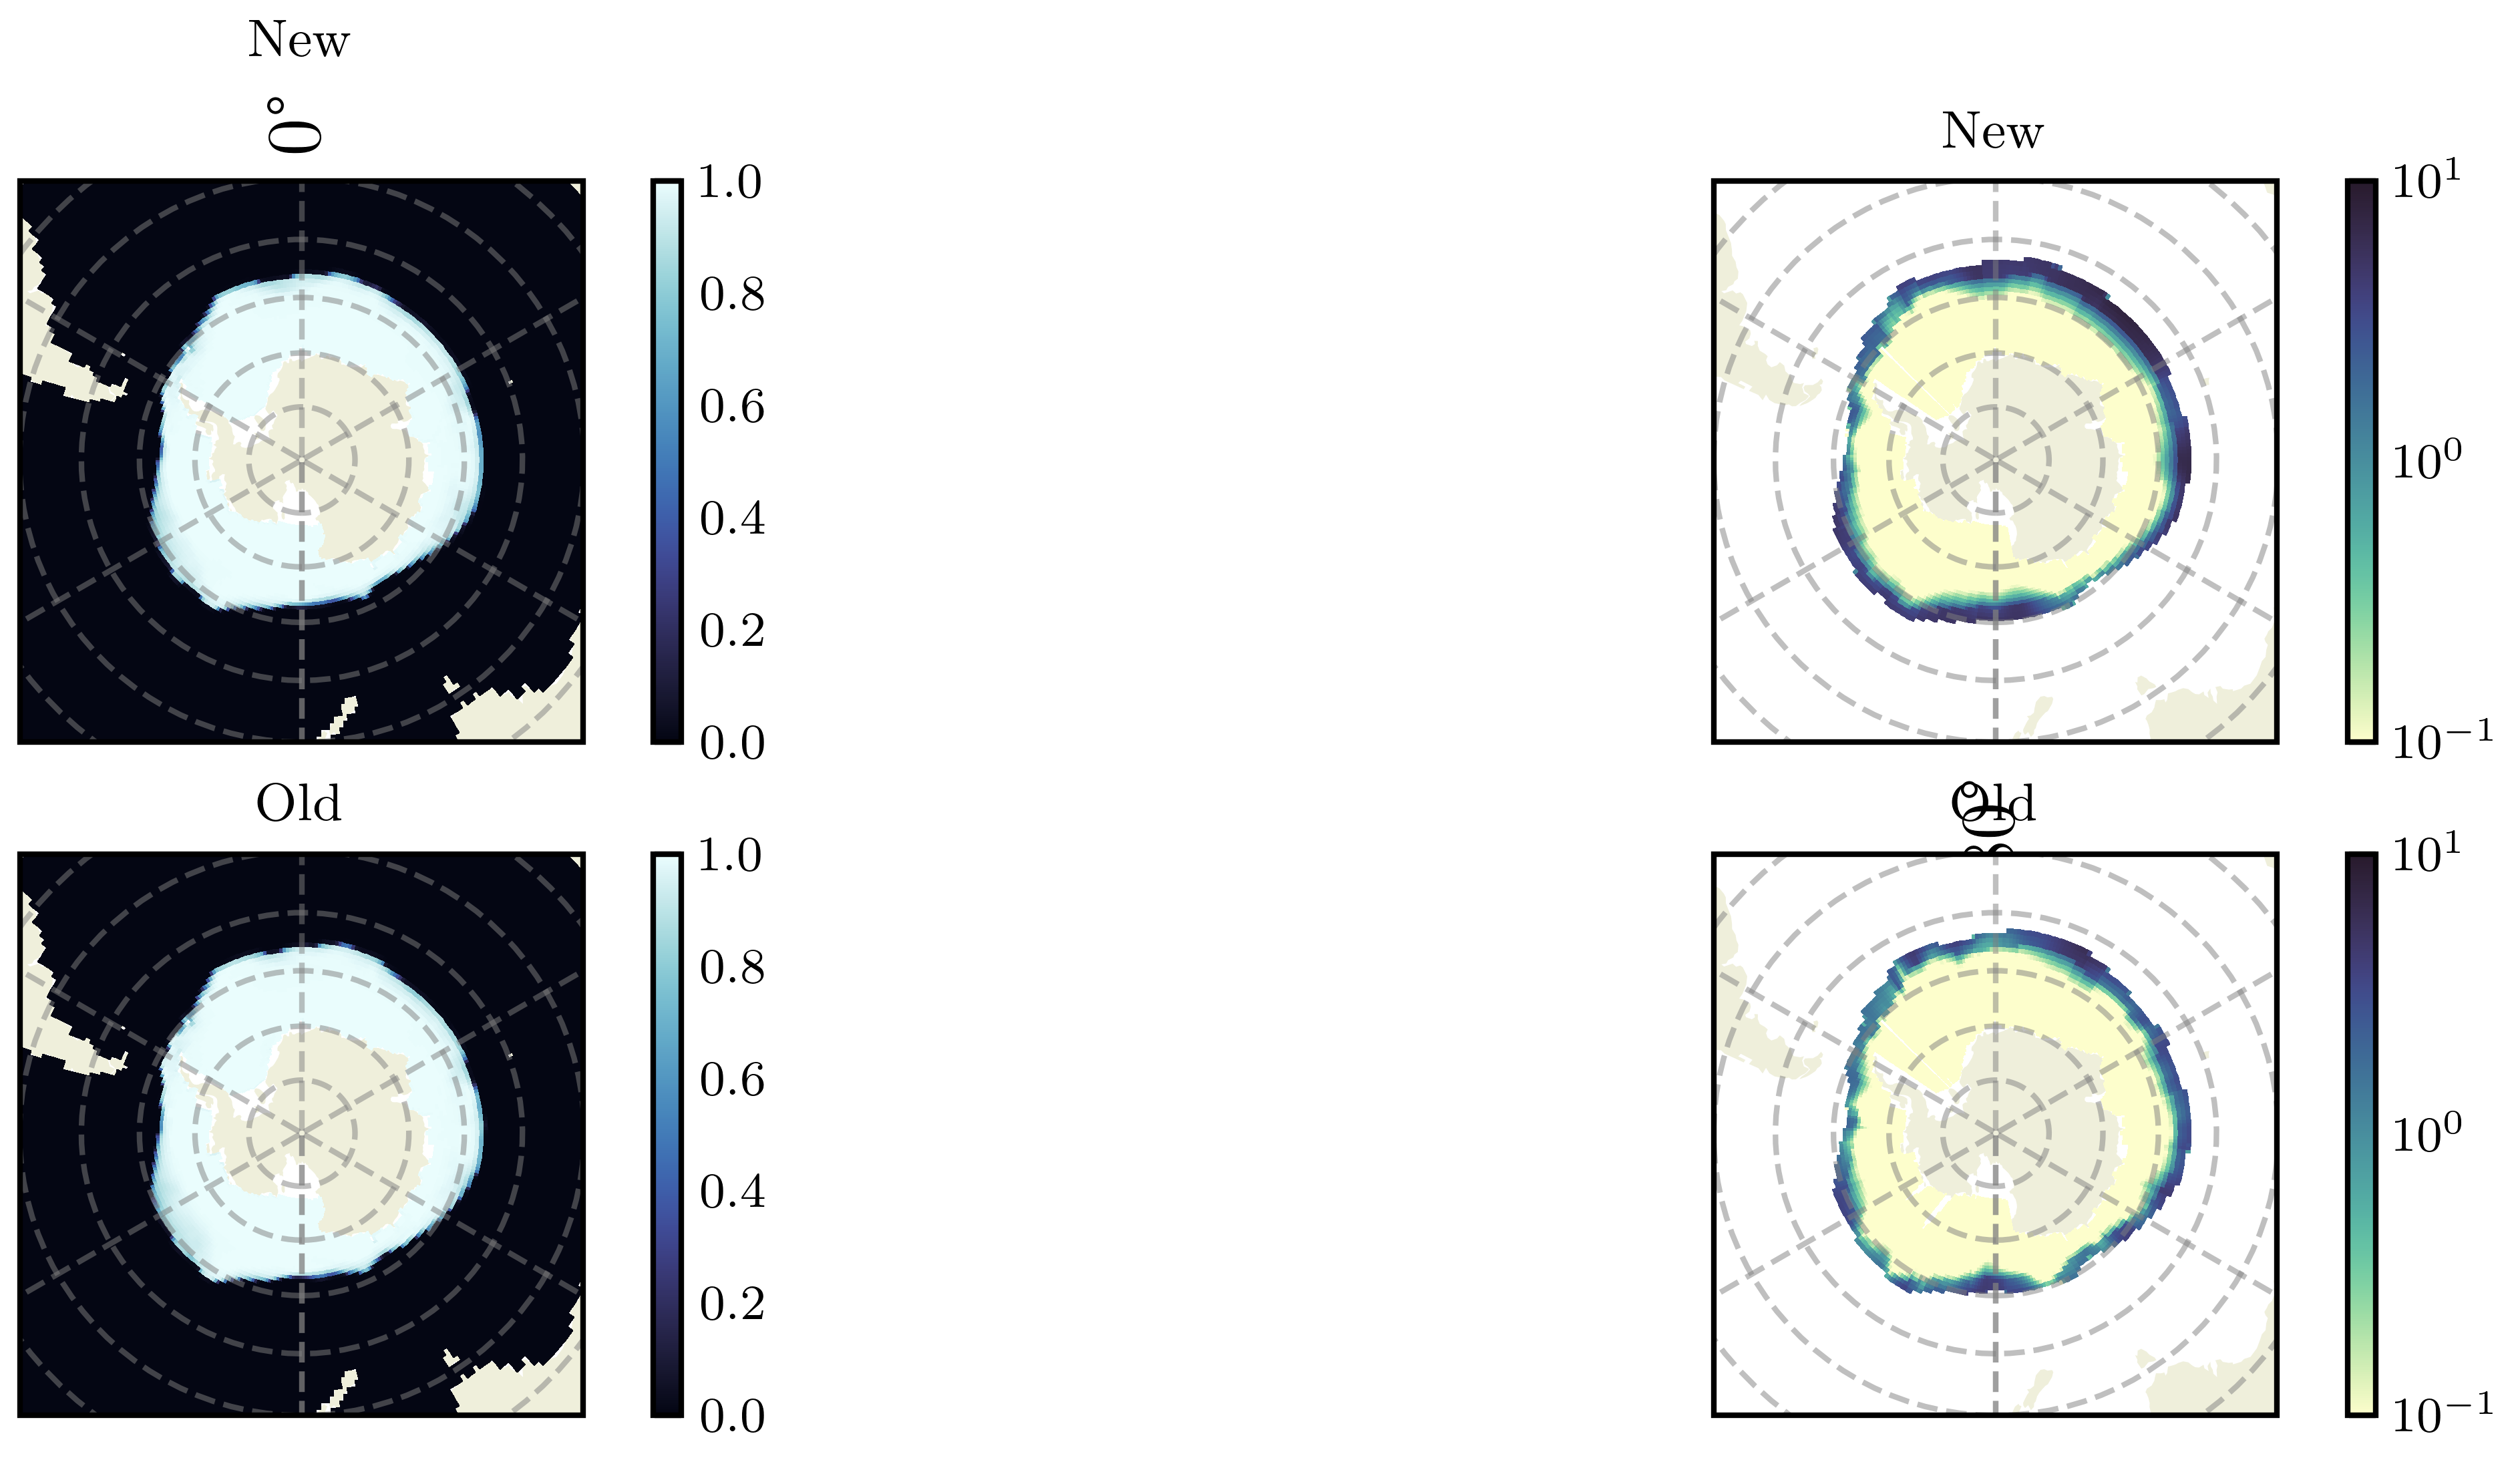

In [14]:
sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av
COLOR = 'black'

year = 2010



fig = plt.figure(figsize=[10, 4])
#ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
#ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(2, 2, 3, projection=ccrs.SouthPolarStereo())
ax4 = fig.add_subplot(2, 2, 4, projection=ccrs.SouthPolarStereo())

ax1.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
ax2.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
ax3.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
ax4.set_extent([-180, 180, -90, -40], ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.LAND)
ax3.add_feature(cfeature.LAND)
ax4.add_feature(cfeature.LAND)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = True
gl.xlabels_bottom = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = True

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = True


gl = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')

cmap = cmo.deep#plt.cm.get_cmap("jet") # cmo.ice

# define the bins and normalize
bounds = np.linspace(0,10,10)#[0, .15, 0.8, 0.9, 0.95, 0.98,0.99, 1.0]# np.linspace(0, 3, 4)
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
filename = mypath + 'iceh.' + str(year) + '-09-01.nc'
ds = xr.open_dataset(filename)

var = 'aice'
cs = ax1.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmo.ice,
                    #norm = norm,
                    vmin=0, vmax=1)#, norm = colors.Norm(vmin=0, vmax=1))
fig.colorbar(cs, ax=ax1)
temp = filename.partition('.')[2]
ax1.title.set_text('New')

var = 'wave_sig_ht'
cs = ax2.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
                    norm = colors.LogNorm(vmin=0.1, vmax=10)
                    #norm = norm,
                   # vmin=0, vmax=10
                   )#, norm = colors.Norm(vmin=0, vmax=1))
fig.colorbar(cs, ax=ax2)
temp = filename.partition('.')[2]
ax2.title.set_text('New')

print('ax1 done')

mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/sea-ice-classification/'
filename = mypath + 'iceh.' + str(year) + '-09-01.nc'
ds = xr.open_dataset(filename)
var = 'aice'
cs = ax3.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmo.ice,
                    #norm = norm,
                    vmin=0, vmax=1)#
fig.colorbar(cs, ax=ax3)
temp = filename.partition('.')[2]

ax3.title.set_text('Old')

var = 'wave_sig_ht'
cs = ax4.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmap,
                    #norm = norm,
                    norm = colors.LogNorm(vmin=0.1, vmax=10)
#                    vmin=0, vmax=10
)#
fig.colorbar(cs, ax=ax4)
temp = filename.partition('.')[2]

ax4.title.set_text('Old')
print('ax2 done')




plot_dir = '/home/566/nd0349/notebooks'
plt.savefig(plot_dir + '/' + 'swh-southpolestero.png', dpi=1000)
plt.savefig(plot_dir + '/' + 'swh.pdf')#, dpi = 300, transparent=False)
plt.show()
